In [1]:
%matplotlib inline
import scipy
import pandas as pd
import numpy as np
from tqdm import tnrange

# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_1samp

# exclude! ...
from opt import generate_exclusion_list

sns.set_context('paper', font_scale=1.5)

# Load all of the data.
The datafiles for the simulations are large and not saved to the repository for this reason. They've been seeded for replicability and can be rerun with the following scripts:

1) To regenerate these simultions, run the script 
`batch_run_generative_models.py`

2) To concatenate the datasets:
`merge_dataframes.py`

Note that the simulations will take several hours (up to a day) on a modern laptop.



In [2]:
file_folder = './data/'
tag = '_update_all_trials__gp=1e-10_prune=500_mu=-0.5_scale=1.0_invtemp_mu=2.0_invtemp_scale=0.5'

In [3]:
# load experiment 2 goals
sims_exp_2 = pd.read_pickle(file_folder + 'exp_2_goals_batch_of_sims{}.pkl'.format(tag))
# columns_drop = ['Start Location', 'End Location', 'Goal Locations', 'Action Map', 'Walls']
# try:
#     sims_exp_2[-1].drop(columns_drop, axis=1, inplace=True)
# except:
#     pass

# files = [
#     file_folder + 'exp_2_goals_batch_of_sims_q_update_all_trials__gp=1e-10_prune=500_mu=-0.5_scale=1.0_invtemp_mu=2.0_invtemp_scale=0.5.pkl',
#     file_folder + 'exp_2_goals_batch_of_sims_nctxq_update_all_trials__gp=1e-10_prune=500_mu=-0.5_scale=1.0_invtemp_mu=2.0_invtemp_scale=0.5.pkl',
#     file_folder + 'exp_2_goals_batch_of_sims_kal_update_all_trials__gp=1e-10_prune=500_mu=-0.5_scale=1.0_invtemp_mu=2.0_invtemp_scale=0.5.pkl',
# ]

# for f in files:
#     sims_exp_2.append(pd.read_pickle(f))
#     try:
#         sims_exp_2[-1].drop(columns_drop, axis=1, inplace=True)
#     except:
#         pass
# sims_exp_2 = pd.concat(sims_exp_2, sort=False)
sims_exp_2 = sims_exp_2[sims_exp_2['In Goal']]
sims_exp_2['Training'] = sims_exp_2.Context <= 2
sims_exp_2['Acc'] = pd.to_numeric(sims_exp_2.Reward)

In [4]:
# load experiment 2 goals
sims_exp_4 = pd.read_pickle(file_folder + 'exp_4_goals_batch_of_sims{}.pkl'.format(tag))
# columns_drop = ['Start Location', 'End Location', 'Goal Locations', 'Action Map', 'Walls']
# try:
#     sims_exp_4[-1].drop(columns_drop, axis=1, inplace=True)
# except:
#     pass

# files = [
#     file_folder + 'exp_4_goals_batch_of_sims_q_update_all_trials__gp=1e-10_prune=500_mu=-0.5_scale=1.0_invtemp_mu=2.0_invtemp_scale=0.5.pkl',
#     file_folder + 'exp_4_goals_batch_of_sims_nctxq_update_all_trials__gp=1e-10_prune=500_mu=-0.5_scale=1.0_invtemp_mu=2.0_invtemp_scale=0.5.pkl',
#     file_folder + 'exp_4_goals_batch_of_sims_kal_update_all_trials__gp=1e-10_prune=500_mu=-0.5_scale=1.0_invtemp_mu=2.0_invtemp_scale=0.5.pkl',
# ]

# for f in files:
#     sims_exp_4.append(pd.read_pickle(f))
#     try:
#         sims_exp_4[-1].drop(columns_drop, axis=1, inplace=True)
#     except:
#         pass
# sims_exp_4 = pd.concat(sims_exp_4, sort=False)
sims_exp_4 = sims_exp_4[sims_exp_4['In Goal']]
sims_exp_4['Training'] = sims_exp_4.Context < 9
sims_exp_4['Acc'] = pd.to_numeric(sims_exp_4.Reward)

In [5]:
# load experiment 2 goals
sims_exp_3 = pd.read_pickle(file_folder + 'exp_3_goals_batch_of_sims{}.pkl'.format(tag))
# columns_drop = ['Start Location', 'End Location', 'Goal Locations', 'Action Map', 'Walls']
# try:
#     sims_exp_3[-1].drop(columns_drop, axis=1, inplace=True)
# except:
#     pass

# files = [
#     file_folder + 'exp_3_goals_batch_of_sims_q_update_all_trials__gp=1e-10_prune=500_mu=-0.5_scale=1.0_invtemp_mu=2.0_invtemp_scale=0.5.pkl',
#     file_folder + 'exp_3_goals_batch_of_sims_nctxq_update_all_trials__gp=1e-10_prune=500_mu=-0.5_scale=1.0_invtemp_mu=2.0_invtemp_scale=0.5.pkl',
#     file_folder + 'exp_3_goals_batch_of_sims_kal_update_all_trials__gp=1e-10_prune=500_mu=-0.5_scale=1.0_invtemp_mu=2.0_invtemp_scale=0.5.pkl',
# ]

# for f in files:
#     sims_exp_3.append(pd.read_pickle(f))
#     try:
#         sims_exp_3[-1].drop(columns_drop, axis=1, inplace=True)
#     except:
#         pass
# sims_exp_3 = pd.concat(sims_exp_3, sort=False)
sims_exp_3 = sims_exp_3[sims_exp_3['In Goal']]
sims_exp_3['Training'] = sims_exp_3.Context < 7
sims_exp_3['Acc'] = pd.to_numeric(sims_exp_3.Reward)

In [6]:
# # load experiment 4 goals
# sims_exp_4 = pd.read_pickle(file_folder + 'exp_4_goals_batch_of_sims{}.pkl'.format(tag))
# sims_exp_4.drop(['Start Location', 'End Location', 'Goal Locations', 'Action Map', 'Walls'], axis=1, inplace=True)
# sims_exp_4 = pd.concat([
#     sims_exp_4,
#     pd.read_pickle(file_folder + 'exp_4_goals_batch_of_sims_q_update_all_trials__gp=1e-10_prune=500_mu=-0.5_scale=1.0_invtemp_mu=2.0_invtemp_scale=0.5.pkl'),
#     pd.read_pickle(file_folder + 'exp_4_goals_batch_of_sims_nctxq_update_all_trials__gp=1e-10_prune=500_mu=-0.5_scale=1.0_invtemp_mu=2.0_invtemp_scale=0.5.pkl'),
#     pd.read_pickle(file_folder + 'exp_4_goals_batch_of_sims_kal_update_all_trials__gp=1e-10_prune=500_mu=-0.5_scale=1.0_invtemp_mu=2.0_invtemp_scale=0.5.pkl')
#   ], sort=False)
# sims_exp_4.drop(['Start Location', 'End Location', 'Goal Locations', 'Action Map', 'Walls'], axis=1, inplace=True)
# sims_exp_4 = sims_exp_4[sims_exp_4['In Goal']]
# sims_exp_4['Training'] = sims_exp_4.Context < 9
# sims_exp_4['Acc'] = pd.to_numeric(sims_exp_4.Reward)

In [7]:
# # load experiment 3 goals
# sims_exp_3 = pd.read_pickle(file_folder + 'exp_3_goals_batch_of_sims{}.pkl'.format(tag))
# sims_exp_3 = pd.concat([
#     sims_exp_3,
#     pd.read_pickle(file_folder + 'exp_3_goals_batch_of_sims_q_update_all_trials__gp=1e-10_prune=500_mu=-0.5_scale=1.0_invtemp_mu=2.0_invtemp_scale=0.5.pkl'),
#     pd.read_pickle(file_folder + 'exp_3_goals_batch_of_sims_nctxq_update_all_trials__gp=1e-10_prune=500_mu=-0.5_scale=1.0_invtemp_mu=2.0_invtemp_scale=0.5.pkl'),
#     pd.read_pickle(file_folder + 'exp_3_goals_batch_of_sims_kal_update_all_trials__gp=1e-10_prune=500_mu=-0.5_scale=1.0_invtemp_mu=2.0_invtemp_scale=0.5.pkl')
#   ], sort=False)
# sims_exp_3.drop(['Start Location', 'End Location', 'Goal Locations', 'Action Map', 'Walls'], axis=1, inplace=True)
# sims_exp_3 = sims_exp_3[sims_exp_3['In Goal']]
# sims_exp_3['Training'] = sims_exp_3.Context < 7
# sims_exp_3['Acc'] = pd.to_numeric(sims_exp_3.Reward)

In [8]:
# General helper function
def reduce_range(df, list_iterations):
    new_df = [None] * len(list_iterations)
    for subj in list_iterations:
        new_df.append(df.loc[df.Iteration == subj, :])
    return pd.concat(new_df)

def draw_batch(df, batch_size=114):
    iterations = np.array(list(set(df.Iteration)))
    n_batches = len(set(df[u'Iteration']))
    sampled_iteration = set()
    while len(sampled_iteration) < batch_size:
        sampled_iteration.add(iterations[np.random.randint(0, n_batches)])
    sampled_iteration = list(sampled_iteration)
    return reduce_range(df, sampled_iteration)

def get_diff_stats(score, idx=0):
    """
    score: pandas.DataFrame with the comparions precomputed
    """
    diff = score.groupby(['Model', 'Comparison','Iteration']).mean().reset_index()
    stats_output = []
    for m in set(diff.Model):
        for c in set(score.Comparison):
            selection = (diff.Model == m) &(diff.Comparison == c)
            t, p = ttest_1samp(diff.loc[selection, 'Difference Score'].values, 0)
            df = len(diff.loc[selection, 'Difference Score'].values) - 1
            M = np.mean(diff.loc[selection, 'Difference Score'].values)
            d = M / np.std(diff.loc[selection, 'Difference Score'].values)
            
            stats_output.append({
                'Model': m,
                'Sample': idx,
                'Comparison': c,
                'Mean': M,
                'd-prime': d,
                't-statistic': t,
                'p-value': p,
                'df': df,
            })
    return stats_output

# construct the 95% HDI for the means
def get_hdi(unsorted_values, hdi=0.95):
    tail = (1. - hdi) / 2
    sorted_values = np.sort(unsorted_values)
    lb = sorted_values[int(np.floor(sorted_values.shape[0] * tail))]
    ub = sorted_values[int(np.ceil(sorted_values.shape[0] * (1 - tail)))]
    return lb, ub
    
def score_acc_2_goals(sampled_batch, batch=0):
    accuracy = list()
    
    df0 = sampled_batch[sampled_batch['In Goal']].copy()
    for m in set(df0.Model):
        for it in set(df0.Iteration):
            subj_df = df0.loc[(df0.Model == m) & (df0.Iteration == it), :]
            accuracy.append({
                'Condition': 'Training',
                'Acc': subj_df.loc[subj_df.Context < 3, 'Acc'].mean(),
                'Iteration': it,
                'Model': m,
                'Batch': ii,
            })
            accuracy.append({
                'Condition': 'Test',
                'Acc': subj_df.loc[subj_df.Context >= 3, 'Acc'].mean(),
                'Iteration': it,
                'Model': m,
                'Batch': ii,
            })
    return accuracy


In [9]:
# print b
# b = 1.4
# print np.exp(p * float(b) - logsumexp(p * float(b)))
# print entropy(np.exp(p * float(b) - logsumexp(p * float(b))))

In [10]:
# ## from scipy.special import logsumexp
# p = np.array([0.5, 0.5, 1.5, 0.5])

# def entropy(p):
#     return -np.sum(np.log2(p) * p)

# betas = np.arange(1, 20, 0.1)
# entropy_list = []
# for b in betas:
#     q = p*float(b)
#     pmf = np.exp(q - logsumexp(q))
#     entropy_list.append(entropy(pmf))

# plt.plot(betas, entropy_list)

# Experiment 1: Joint Structure

In [11]:
# experiment 2 goals
def draw_exp_2_sample():
    n_task_a = 49
    n_task_b = 80

    # sampled_batch = draw_batch(sims_exp_2, batch_size=n_task_b)

    # the sample sizes of task A and task B are uneven in the subject pool,
    # reduce the sample accordingly
    b_sample = draw_batch(sims_exp_2[sims_exp_2.Task == 'B'],  batch_size=n_task_b)
    a_sample = draw_batch(sims_exp_2[sims_exp_2.Task == 'A'],  batch_size=n_task_a)

    return pd.concat([b_sample, a_sample])

def score_experiment_2(sampled_batch, idx):
    sampled_batch0 = sampled_batch[
        (~sampled_batch.Training) & (sampled_batch['Times Seen Context'] <= 4)
    ].copy()
    sampled_batch0['Correct Goal'] = ['A'] * len(sampled_batch0)
    sampled_batch0.loc[sampled_batch0.Context == 5, 'Correct Goal'] = 'B'
    grouped = sampled_batch0.groupby(['Model', 'Task', 'Correct Goal'])
    scored = grouped.mean()['Acc'].reset_index()
    scored['Sample'] = idx
    return scored

def score_experiment_2_first_trial(sampled_batch, idx):
    sampled_batch0 = sampled_batch[
        (~sampled_batch.Training) & (sampled_batches['Trial Number'] == 32.0)
    ].copy()
    sampled_batch0['Correct Goal'] = ['A'] * len(sampled_batch0)
    sampled_batch0.loc[sampled_batch0.Context == 5, 'Correct Goal'] = 'B'
    grouped = sampled_batch0.groupby(['Model', 'Task', 'Correct Goal'])
    scored = grouped.mean()['Acc'].reset_index()
    scored['Sample'] = idx
    return scored



In [12]:
stats_exp_2_goals = []
exp_2_goals_acc = []
stats_exp_2_goals_first_trial = []

n_batches=200

for ii in tnrange(n_batches):
    sampled_batches = draw_exp_2_sample()
    
    stats_exp_2_goals.append(
        score_experiment_2(sampled_batches, ii))
    
    stats_exp_2_goals_first_trial.append(
        score_experiment_2_first_trial(sampled_batches, ii))
    
    # get the overall accuracy
    exp_2_goals_acc += score_acc_2_goals(sampled_batches, batch=ii)

stats_exp_2_goals_first_trial = pd.concat(stats_exp_2_goals_first_trial)
stats_exp_2_goals = pd.concat(stats_exp_2_goals)
exp_2_goals_acc = pd.DataFrame(exp_2_goals_acc)


/Users/nicholasfranklin/anaconda3/envs/comp_gen/lib/python2.7/site-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  import sys


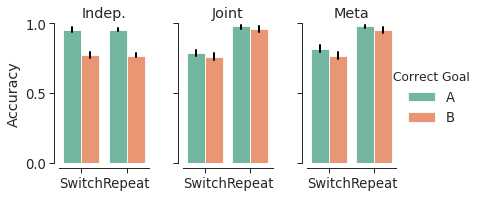

In [13]:
with sns.axes_style('ticks'):
    exclude = (stats_exp_2_goals.Model != 'Flat') & (stats_exp_2_goals.Model != 'KalmanUCB') & \
        (stats_exp_2_goals.Model != 'Q-Learner') & (stats_exp_2_goals.Model != 'NoCTX_Q-Learner')
    g = sns.catplot(
        hue='Correct Goal', y='Acc', data=stats_exp_2_goals[exclude],
        kind='bar', col='Model',
        x='Task',  hue_order=['A', 'B'], ci=None,
        palette='Set2', height=3.0, aspect=0.63, estimator=np.median,
    )
    sns.despine(offset=5)

    g.set_xticklabels('Switch Repeat'.split())
    g.set_xlabels('')
    g.set_ylabels('Accuracy')
    g.axes[0][0].set_yticks(np.arange(0, 1.01, 0.5))
    g.axes[0][0].set_ylim(0.0, 1)

    g.axes[0][0].set_title('Indep.')
    g.axes[0][1].set_title('Joint')
    g.axes[0][2].set_title('Meta')
    
    # plot the error bars
    def _plot_hdi(model, ax):
        v = stats_exp_2_goals.loc[
            (stats_exp_2_goals.Model == model) & 
            (stats_exp_2_goals.Task == 'A') & 
            (stats_exp_2_goals['Correct Goal'] == 'A')  ,'Acc'].values
        lb, ub = get_hdi(v)
        ax.plot([-0.2, -0.2], [lb, ub], lw=2, color='k')
        
        v = stats_exp_2_goals.loc[
            (stats_exp_2_goals.Model == model) & 
            (stats_exp_2_goals.Task == 'A') & 
            (stats_exp_2_goals['Correct Goal'] == 'B')  ,'Acc'].values
        lb, ub = get_hdi(v)
        ax.plot([0.2, 0.2], [lb, ub], lw=2, color='k')

        v = stats_exp_2_goals.loc[
            (stats_exp_2_goals.Model == model) & 
            (stats_exp_2_goals.Task == 'B') & 
            (stats_exp_2_goals['Correct Goal'] == 'A')  ,'Acc'].values
        lb, ub = get_hdi(v)
        ax.plot([0.8, 0.8], [lb, ub], lw=2, color='k')
        v = stats_exp_2_goals.loc[
            (stats_exp_2_goals.Model == model) & 
            (stats_exp_2_goals.Task == 'B') & 
            (stats_exp_2_goals['Correct Goal'] == 'B')  ,'Acc'].values
        lb, ub = get_hdi(v)
        ax.plot([1.2, 1.2], [lb, ub], lw=2, color='k')
        
    _plot_hdi('Independent', g.axes[0][0])
    _plot_hdi('Joint', g.axes[0][1])
    _plot_hdi('Meta', g.axes[0][2])
#     plt.savefig('exp_2_goals_fig_models.png', dpi=300, bbox_inches='tight')

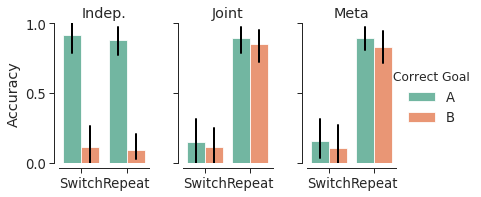

In [14]:
# first trial only in test phase
with sns.axes_style('ticks'):
    exclude = \
        (stats_exp_2_goals_first_trial.Model != 'Flat') & \
        (stats_exp_2_goals_first_trial.Model != 'KalmanUCB') & \
        (stats_exp_2_goals_first_trial.Model != 'Q-Learner') & \
        (stats_exp_2_goals_first_trial.Model != 'NoCTX_Q-Learner')
    
    g = sns.catplot(
        hue='Correct Goal', y='Acc', 
        data=stats_exp_2_goals_first_trial[exclude],
        kind='bar', col='Model',
        x='Task',  hue_order=['A', 'B'], ci=None,
        palette='Set2', height=3.0, aspect=0.63, estimator=np.median,
    )
    sns.despine(offset=5)

    g.set_xticklabels('Switch Repeat'.split())
    g.set_xlabels('')
    g.set_ylabels('Accuracy')
    g.axes[0][0].set_yticks(np.arange(0, 1.01, 0.5))
    g.axes[0][0].set_ylim(0.0, 1)

    g.axes[0][0].set_title('Indep.')
    g.axes[0][1].set_title('Joint')
    g.axes[0][2].set_title('Meta')
    
    # plot the error bars
    def _plot_hdi(model, ax):
        v = stats_exp_2_goals_first_trial.loc[
            (stats_exp_2_goals_first_trial.Model == model) & 
            (stats_exp_2_goals_first_trial.Task == 'A') & 
            (stats_exp_2_goals_first_trial['Correct Goal'] == 'A')  ,'Acc'].values
        lb, ub = get_hdi(v)
        ax.plot([-0.2, -0.2], [lb, ub], lw=2, color='k')
        
        v = stats_exp_2_goals_first_trial.loc[
            (stats_exp_2_goals_first_trial.Model == model) & 
            (stats_exp_2_goals_first_trial.Task == 'A') & 
            (stats_exp_2_goals_first_trial['Correct Goal'] == 'B')  ,'Acc'].values
        lb, ub = get_hdi(v)
        ax.plot([0.2, 0.2], [lb, ub], lw=2, color='k')

        v = stats_exp_2_goals_first_trial.loc[
            (stats_exp_2_goals_first_trial.Model == model) & 
            (stats_exp_2_goals_first_trial.Task == 'B') & 
            (stats_exp_2_goals_first_trial['Correct Goal'] == 'A')  ,'Acc'].values
        lb, ub = get_hdi(v)
        ax.plot([0.8, 0.8], [lb, ub], lw=2, color='k')
        v = stats_exp_2_goals_first_trial.loc[
            (stats_exp_2_goals_first_trial.Model == model) & 
            (stats_exp_2_goals_first_trial.Task == 'B') & 
            (stats_exp_2_goals_first_trial['Correct Goal'] == 'B')  ,'Acc'].values
        lb, ub = get_hdi(v)
        ax.plot([1.2, 1.2], [lb, ub], lw=2, color='k')
        
    _plot_hdi('Independent', g.axes[0][0])
    _plot_hdi('Joint', g.axes[0][1])
    _plot_hdi('Meta', g.axes[0][2])
#     plt.savefig('exp_2_goals_fig_models.png', dpi=300, bbox_inches='tight')

In [15]:
# get statistics on the simple effects
model = 'Independent'

def hdi_main_effect_task(model):
    v0 = stats_exp_2_goals.loc[
                (stats_exp_2_goals.Model == model) & 
                (stats_exp_2_goals.Task == 'A') ,'Acc'].values
    v1 = stats_exp_2_goals.loc[
                (stats_exp_2_goals.Model == model) & 
                (stats_exp_2_goals.Task == 'B') ,'Acc'].values
    diff = v0 - v1
    diff.sort()    
    return np.mean(diff), get_hdi(diff)

def hdi_main_effect_goal(model):
    v0 = stats_exp_2_goals.loc[
                (stats_exp_2_goals.Model == model) & 
                (stats_exp_2_goals['Correct Goal'] == 'A') ,'Acc'].values
    v1 = stats_exp_2_goals.loc[
                (stats_exp_2_goals.Model == model) & 
                (stats_exp_2_goals['Correct Goal'] == 'B') ,'Acc'].values
    diff = v0 - v1
    diff.sort()
    
    return np.mean(diff), get_hdi(diff)

print 'Independent (task): {}'.format(hdi_main_effect_task('Independent'))
print 'Independent (goal): {}'.format(hdi_main_effect_goal('Independent'))
print
print 'Joint (task): {}'.format(hdi_main_effect_task('Joint'))
print 'Joint (goal): {}'.format(hdi_main_effect_goal('Joint'))
print
print 'Meta (task): {}'.format(hdi_main_effect_task('Meta'))
print 'Meta (goal): {}'.format(hdi_main_effect_goal('Meta'))
print
print 'Flat (task): {}'.format(hdi_main_effect_task('Flat'))
print 'Flat (goal): {}'.format(hdi_main_effect_goal('Flat'))
print
print 'Q-Learner (task): {}'.format(hdi_main_effect_task('Q-Learner'))
print 'Q-Learner (goal): {}'.format(hdi_main_effect_goal('Q-Learner'))
print
print 'NoCTX_Q-Learner (task): {}'.format(hdi_main_effect_task('NoCTX_Q-Learner'))
print 'NoCTX_Q-Learner (goal): {}'.format(hdi_main_effect_goal('NoCTX_Q-Learner'))
print
print 'KalmanUCB (task): {}'.format(hdi_main_effect_task('KalmanUCB'))
print 'KalmanUCB (goal): {}'.format(hdi_main_effect_goal('KalmanUCB'))

Independent (task): (-0.00020137117346938794, (-0.026275510204081698, 0.024043367346938793))
Independent (goal): (0.18490959821428576, (0.15816326530612246, 0.20918367346938782))

Joint (task): (-0.19469347895408162, (-0.22499999999999998, -0.1623086734693877))
Joint (goal): (0.021902024872448987, (0.0, 0.05102040816326525))

Meta (task): (-0.17271619897959184, (-0.21447704081632646, -0.13810586734693875))
Meta (goal): (0.04083450255102042, (0.0078125, 0.07908163265306123))

Flat (task): (-0.002096380739795919, (-0.03973214285714288, 0.04088010204081627))
Flat (goal): (-0.003481425382653057, (-0.04591836734693877, 0.0357142857142857))

Q-Learner (task): (7.963966836734725e-05, (-0.054400510204081653, 0.056823979591836715))
Q-Learner (goal): (0.004204480229591839, (-0.04081632653061218, 0.0535714285714286))

NoCTX_Q-Learner (task): (-0.004240593112244899, (-0.14343112244897965, 0.1419642857142857))
NoCTX_Q-Learner (goal): (0.0514625318877551, (-0.14285714285714285, 0.23750000000000004))

In [16]:
# get statistics on the simple effects
model = 'Independent'

def hdi_main_effect_task(model):
    v0 = stats_exp_2_goals_first_trial.loc[
                (stats_exp_2_goals_first_trial.Model == model) & 
                (stats_exp_2_goals_first_trial.Task == 'A') ,'Acc'].values
    v1 = stats_exp_2_goals_first_trial.loc[
                (stats_exp_2_goals_first_trial.Model == model) & 
                (stats_exp_2_goals_first_trial.Task == 'B') ,'Acc'].values
    diff = v0 - v1
    diff.sort()    
    return np.mean(diff), get_hdi(diff)

def hdi_main_effect_goal(model):
    v0 = stats_exp_2_goals_first_trial.loc[
                (stats_exp_2_goals_first_trial.Model == model) & 
                (stats_exp_2_goals_first_trial['Correct Goal'] == 'A') ,'Acc'].values
    v1 = stats_exp_2_goals_first_trial.loc[
                (stats_exp_2_goals_first_trial.Model == model) & 
                (stats_exp_2_goals_first_trial['Correct Goal'] == 'B') ,'Acc'].values
    diff = v0 - v1
    diff.sort()
    
    return np.mean(diff), get_hdi(diff)

print 'Independent (task): {}'.format(hdi_main_effect_task('Independent'))
print 'Independent (goal): {}'.format(hdi_main_effect_goal('Independent'))
print
print 'Joint (task): {}'.format(hdi_main_effect_task('Joint'))
print 'Joint (goal): {}'.format(hdi_main_effect_goal('Joint'))
print
print 'Meta (task): {}'.format(hdi_main_effect_task('Meta'))
print 'Meta (goal): {}'.format(hdi_main_effect_goal('Meta'))
print
print 'Flat (task): {}'.format(hdi_main_effect_task('Flat'))
print 'Flat (goal): {}'.format(hdi_main_effect_goal('Flat'))
print
print 'Q-Learner (task): {}'.format(hdi_main_effect_task('Q-Learner'))
print 'Q-Learner (goal): {}'.format(hdi_main_effect_goal('Q-Learner'))
print
print 'NoCTX_Q-Learner (task): {}'.format(hdi_main_effect_task('NoCTX_Q-Learner'))
print 'NoCTX_Q-Learner (goal): {}'.format(hdi_main_effect_goal('NoCTX_Q-Learner'))
print
print 'KalmanUCB (task): {}'.format(hdi_main_effect_task('KalmanUCB'))
print 'KalmanUCB (goal): {}'.format(hdi_main_effect_goal('KalmanUCB'))

Independent (task): (0.02747255456949879, (-0.12418300653594772, 0.16996047430830039))
Independent (goal): (0.7835132814597532, (0.6285355122564424, 0.9264613450659963))

Joint (task): (-0.7443110357595587, (-0.9069767441860465, -0.5648780487804879))
Joint (goal): (0.030184452269654712, (-0.14381270903010035, 0.22752985543683213))

Meta (task): (-0.7285764251698698, (-0.8981481481481481, -0.5418060200668896))
Meta (goal): (0.056144145754474205, (-0.12, 0.21333333333333332))

Flat (task): (0.021294276136660652, (-0.2218468468468468, 0.2724358974358974))
Flat (goal): (-0.01400667721313746, (-0.26755852842809363, 0.225))

Q-Learner (task): (0.012542072845771086, (-0.26666666666666666, 0.29545454545454547))
Q-Learner (goal): (-0.002917468252790849, (-0.2619047619047619, 0.2670454545454546))

NoCTX_Q-Learner (task): (0.007762645078272694, (-0.23193473193473196, 0.25869565217391305))
NoCTX_Q-Learner (goal): (0.02930587524351207, (-0.20370370370370372, 0.2912457912457912))

KalmanUCB (task): 

In [17]:
def main_effect_task_mean_sd(model):
    v0 = stats_exp_2_goals.loc[
                (stats_exp_2_goals.Model == model) & 
                (stats_exp_2_goals.Task == 'A') ,'Acc'].values
    v1 = stats_exp_2_goals.loc[
                (stats_exp_2_goals.Model == model) & 
                (stats_exp_2_goals.Task == 'B') ,'Acc'].values
    diff = -v0 + v1
    diff.sort()    
    return np.mean(diff), np.std(diff)

def main_effect_goal_mean_sd(model):
    v0 = stats_exp_2_goals.loc[
                (stats_exp_2_goals.Model == model) & 
                (stats_exp_2_goals['Correct Goal'] == 'A') ,'Acc'].values
    v1 = stats_exp_2_goals.loc[
                (stats_exp_2_goals.Model == model) & 
                (stats_exp_2_goals['Correct Goal'] == 'B') ,'Acc'].values
    diff = v0 - v1
    diff.sort()
    
    return np.mean(diff), np.std(diff)


In [18]:
model = 'Joint'
mu_goal, sd_goal = main_effect_goal_mean_sd(model)
mu_task, sd_task = main_effect_task_mean_sd(model) 
pd.DataFrame({
    "Comparison": ['Task', 'Goal'],
    'Mean': [mu_task, mu_goal],
})

,Comparison,Mean
0,Task,0.194693
1,Goal,0.021902


In [19]:

def plot_contrasts_exp_2_goals(model, model_name):
    with sns.plotting_context('paper', font_scale=1.75):
        with sns.axes_style('ticks'):
            fig, ax  = plt.subplots(figsize=(1.0, 2.5))
            mu_goal, sd_goal = main_effect_goal_mean_sd(model)
            mu_task, sd_task = main_effect_task_mean_sd(model) 
            sns.barplot(x='Comparison', y='Mean', 
                    data=pd.DataFrame({"Comparison": ['Task', 'Goal'],'Mean': [mu_task, mu_goal],}
                                     ), color='skyblue', ax=ax, ci=None,
                        order=['Task', 'Goal'])


            ax.set_ylabel(r'Difference Score', labelpad=-3)
            ax.set_xlabel('')
            ax.plot([-1, 2], [0, 0], 'k:')
            ax.set_xlim([-0.5, 1.5])
            ax.set_yticks(np.arange(-0.1, 0.35, 0.1))
            ax.set_ylim([-0.1, 0.35])
            sns.despine(offset=5)

            plt.xticks([0, 1], [r'Rep.', 'Goal' ], rotation='vertical')
    #         plt.xticks([0, 1], [r'R', 'G' ])

            def plot_stars(x0):
                ax.annotate("*", xy=(x0-0.175, 0.25), size=22)

            # plot the error bars
            _, (lb, ub) = hdi_main_effect_task(model)
            ax.plot([0, 0],[mu_task-sd_task, mu_task+sd_task], 'k', lw=2)

            if np.sign(lb) == np.sign(ub):
                plot_stars(0)

            _, (lb, ub) = hdi_main_effect_goal(model)
            ax.plot([1, 1],[mu_goal-sd_goal, mu_goal+sd_goal], 'k', lw=2)

            if np.sign(lb) == np.sign(ub):
                plot_stars(1)

            ax.set_title(model_name)
            return fig, ax

def plot_contrasts_exp_2_goals_to_save(model, model_name, height=1.2):
    with sns.plotting_context('paper', font_scale=1):
        with sns.axes_style('ticks'):
            fig, ax  = plt.subplots(figsize=(height/2.5, height))
            mu_goal, sd_goal = main_effect_goal_mean_sd(model)
            mu_task, sd_task = main_effect_task_mean_sd(model) 
            sns.barplot(x='Comparison', y='Mean', 
                    data=pd.DataFrame({"Comparison": ['Task', 'Goal'],'Mean': [mu_task, mu_goal],}
                                     ), color='skyblue', ax=ax, ci=None,
                        order=['Task', 'Goal'])


            ax.set_ylabel(r'Difference Score', labelpad=0)
#             ax.set_ylabel('')
            ax.set_xlabel('')
            ax.plot([-1, 2], [0, 0], 'k:')
            ax.set_xlim([-0.5, 1.5])
            ax.set_yticks(np.arange(-0.1, 0.35, 0.1))
            ax.set_ylim([-0.1, 0.35])
            sns.despine(offset=5)

            plt.xticks([0, 1], [r'Rep.', 'Goal' ], rotation='vertical')
    #         plt.xticks([0, 1], [r'R', 'G' ])

            def plot_stars(x0):
                ax.annotate("*", xy=(x0-0.175, 0.25), size=8)

            # plot the error bars
            _, (lb, ub) = hdi_main_effect_task(model)
            ax.plot([0, 0],[mu_task-sd_task, mu_task+sd_task], 'k', lw=1)

            if np.sign(lb) == np.sign(ub):
                plot_stars(0)

            _, (lb, ub) = hdi_main_effect_goal(model)
            ax.plot([1, 1],[mu_goal-sd_goal, mu_goal+sd_goal], 'k', lw=1)

            if np.sign(lb) == np.sign(ub):
                plot_stars(1)
                
            ax.spines['left'].set_lw(0.2)
            ax.spines['bottom'].set_lw(0.2)
            ax.tick_params(width=0.2)

            ax.set_title(model_name)
            return fig, ax



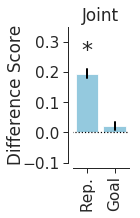

In [20]:
fig, _ = plot_contrasts_exp_2_goals('Joint', 'Joint')


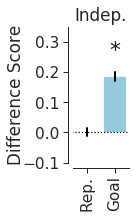

In [21]:
fig, _ = plot_contrasts_exp_2_goals('Independent', 'Indep.')

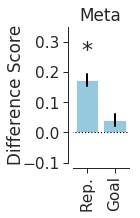

In [22]:
fig, _ = plot_contrasts_exp_2_goals('Meta', 'Meta')

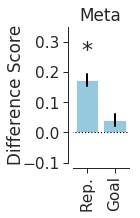

In [23]:
fig, _ = plot_contrasts_exp_2_goals('Meta', 'Meta')

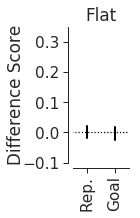

In [24]:
fig, _ = plot_contrasts_exp_2_goals('Flat', 'Flat')

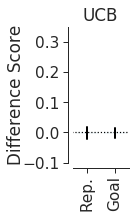

In [25]:
fig, _ = plot_contrasts_exp_2_goals('KalmanUCB', 'UCB')


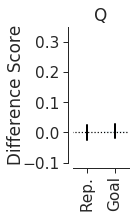

In [26]:
fig, _ = plot_contrasts_exp_2_goals('Q-Learner', 'Q')


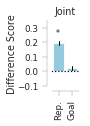

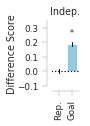

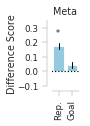

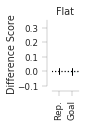

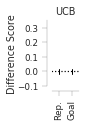

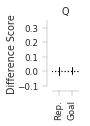

In [27]:
fig, ax = plot_contrasts_exp_2_goals_to_save('Joint', 'Joint')
fig.savefig('exp_2_goals_model_joint.png', dpi=300, bbox_inches='tight')
fig, _ = plot_contrasts_exp_2_goals_to_save('Independent', 'Indep.')
fig.savefig('exp_2_goals_model_indep.png', dpi=300, bbox_inches='tight')
fig, _ = plot_contrasts_exp_2_goals_to_save('Meta', 'Meta')
fig.savefig('exp_2_goals_model_meta.png', dpi=300, bbox_inches='tight')
fig, _ = plot_contrasts_exp_2_goals_to_save('Flat', 'Flat')
fig.savefig('exp_2_goals_model_flat.png', dpi=300, bbox_inches='tight')
fig, _ = plot_contrasts_exp_2_goals_to_save('KalmanUCB', 'UCB')
fig.savefig('exp_2_goals_model_kal.png', dpi=300, bbox_inches='tight')
fig, _ = plot_contrasts_exp_2_goals_to_save('Q-Learner', 'Q')
fig.savefig('exp_2_goals_model_q.png', dpi=300, bbox_inches='tight')

Independent: 1.0
Joint: 0.9575
Meta: 0.995
Flat: 0.43
Q: 0.55
UCB: 0.4475


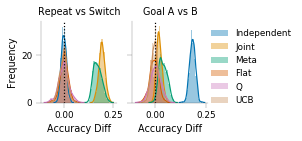

In [28]:
taskA = stats_exp_2_goals.Task == 'A'
goalA = stats_exp_2_goals['Correct Goal'] == 'A'
model = stats_exp_2_goals.Model
cc = sns.color_palette('colorblind')

with sns.plotting_context('paper', font_scale=1.0):
    _, axes = plt.subplots(1, 2, figsize=(3, 1.5), sharey=True, )
    def plot_dist(m_name, label, ii):
            sns.distplot(stats_exp_2_goals.loc[(~taskA) & (model == m_name), 'Acc'].values - \
                         stats_exp_2_goals.loc[(taskA) & (model == m_name), 'Acc'].values, label=label, color=cc[ii],
                        ax=axes[0])

    plot_dist('Independent','Independent', 0)
    plot_dist('Joint','Joint', 1)
    plot_dist('Meta','Meta', 2)
    plot_dist('Flat', 'Flat', 3)
    plot_dist('Q-Learner', 'Q', 4)
    plot_dist('KalmanUCB', 'UCB', 5)

    def plot_dist(m_name, label, ii):
        sns.distplot(stats_exp_2_goals.loc[(goalA) & (model == m_name), 'Acc'].values - \
                     stats_exp_2_goals.loc[(~goalA) & (model == m_name), 'Acc'].values, label=label, color=cc[ii],
                    ax=axes[1])
        
        print "{}: {}".format(label, np.mean(stats_exp_2_goals.loc[(goalA) & (model == m_name), 'Acc'].values > \
                     stats_exp_2_goals.loc[(~goalA) & (model == m_name), 'Acc'].values))

    plot_dist('Independent','Independent', 0)
    plot_dist('Joint','Joint', 1)
    plot_dist('Meta','Meta', 2)
    plot_dist('Flat', 'Flat', 3)
    plot_dist('Q-Learner', 'Q', 4)
    plot_dist('KalmanUCB', 'UCB', 5)


    axes[0].set_ylabel('Frequency')
    axes[0].set_xlabel('Accuracy Diff')
    axes[0].set_title('Repeat vs Switch')

    axes[1].set_xlabel('Accuracy Diff')
    axes[1].set_title('Goal A vs B')
    sns.despine()
    
    for ax in axes:
        ax.spines['left'].set_lw(0.2)
        ax.spines['bottom'].set_lw(0.2)
        ax.tick_params(width=0.2)

    lgd = axes[1].legend(loc='upper right', bbox_to_anchor=(2.2, 1.00), framealpha=0)

    for ii in [0, 1]: axes[ii].axvline(x=0, ls=':', color='k') 

    plt.savefig('exp_2_goals_effect_size_all.png', dpi=300,bbox_extra_artists=(lgd,),
                bbox_inches='tight')


In [29]:
model_acc_exp2 = stats_exp_2_goals.groupby(['Model']).mean().sort_values('Acc')

In [31]:
# for comparison, load the subject data
exp_2_goals_subj = pd.read_pickle(file_folder + '/exp3_data.pkl')



excluded = generate_exclusion_list(exp_2_goals_subj, training_contexts=3, binom=False)
for e in excluded:
    exp_2_goals_subj = exp_2_goals_subj[exp_2_goals_subj.subj != e]
print len(list(set(exp_2_goals_subj.subj)))
exp_2_goals_subj['Accuracy'] = exp_2_goals_subj['Reward'] / 10.0
exp_2_goals_subj['Training'] = exp_2_goals_subj.loc[:, 'Context'] < 4

100%|██████████| 196/196 [00:31<00:00,  6.16it/s]


N clusters = 2, Covarainace = diag
129


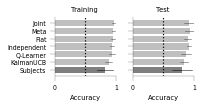

In [32]:
with sns.plotting_context('paper', font_scale=0.7):

    order = pd.DataFrame(exp_2_goals_acc[exp_2_goals_acc.Model != 'NoCTX_Q-Learner']
                        ).groupby(['Condition', 'Model']
                ).mean().loc['Training'].sort_values('Acc', ascending=False)

    g = sns.catplot(data=pd.DataFrame(exp_2_goals_acc),
                y='Model', x='Acc', ci='sd', col='Condition',
                col_order=['Training', 'Test'],
                kind='bar', orient='h', color=[0.75, 0.75, 0.75], height=1.5, 
                aspect=1., order=order.index, errwidth=0.5, 
                   )

    plt.ylabel('')
    plt.xlim([0, 1])
    for ii in [0, 1]:
        g.axes[0][ii].set_xlabel('Accuracy')
        g.axes[0][ii].axvline(x=0.5, c='k', ls=':')
    df0 = sims_exp_4.groupby(['Model']).mean().sort_values('Acc')

    g.axes[0][0].set_ylabel('')

    g.axes[0][0].set_title('Training')
    g.axes[0][1].set_title('Test')

    for ax, _bool in zip(g.axes[0], [True, False]):
        mu = exp_2_goals_subj[
            (exp_2_goals_subj['In Goal']) & (_bool == exp_2_goals_subj['Training'])
        ].groupby('subj').mean().mean()['Accuracy']
        std = exp_2_goals_subj[
            exp_2_goals_subj['In Goal'] & (_bool == exp_2_goals_subj['Training'])
        ].groupby('subj').mean().std()['Accuracy'] 


        ax.barh([6.0], [mu], facecolor='k', alpha=0.5 )
        ax.plot([mu-std, mu+std], [6., 6.], c='k', lw=0.5)

    plt.ylabel('')
    plt.xlim([0, 1])
    plt.xlabel('Accuracy')
    
        
    for ax in g.axes[0]:
        ax.spines['left'].set_lw(0.2)
        ax.spines['bottom'].set_lw(0.2)
        ax.tick_params(width=0.2)

    g.axes[0][0].set_yticks(range(0, 7))
    g.axes[0][0].set_yticklabels(order.index.to_list() + ['Subjects'])

    plt.savefig('exp_2_goals_acc.png', dpi=300)

In [34]:
# here we do significance testing to show that none of the batches
# of models is every below change at the group level

pd.DataFrame(exp_2_goals_acc).groupby(['Model','Condition','Batch']
                                     ).mean().groupby(['Model','Condition']).min()

Acc    Iteration
Model           Condition                       
Flat            Test       0.890019  2619.891473
                Training   0.944767  2619.891473
Independent     Test       0.911822  2619.891473
                Training   0.930717  2619.891473
Joint           Test       0.909884  2619.891473
                Training   0.955669  2619.891473
KalmanUCB       Test       0.828973  2619.891473
                Training   0.874031  2619.891473
Meta            Test       0.918120  2619.891473
                Training   0.950339  2619.891473
NoCTX_Q-Learner Test       0.422481  2619.891473
                Training   0.432897  2619.891473
Q-Learner       Test       0.856105  2619.891473
                Training   0.921754  2619.891473

In [35]:
# here we do signficiance testing to show whether there is a benefit to generalization

comp_df = pd.DataFrame(exp_2_goals_acc)
# batch_v = comp_df.Batch
training_v = comp_df.Condition == 'Training'
acc_meas = []
for ii in set(comp_df.Batch):
    # get the accuracy of the Joint and flat models in each condition
    b = comp_df.Batch == ii
    acc_meas.append({
        'Overall': comp_df.loc[b & (comp_df.Model == 'Joint'), 'Acc'].mean() - \
                   comp_df.loc[b & (comp_df.Model == 'Flat'), 'Acc'].mean(),
        'Training':comp_df.loc[b & (comp_df.Model == 'Joint') & training_v, 'Acc'].mean() - \
                   comp_df.loc[b & (comp_df.Model == 'Flat') & training_v, 'Acc'].mean(),
        'Test':comp_df.loc[b & (comp_df.Model == 'Joint') & (training_v==False), 'Acc'].mean() - \
               comp_df.loc[b & (comp_df.Model == 'Flat') & (training_v==False), 'Acc'].mean(),
        'batch': ii
        
    })
    
acc_meas = pd.DataFrame(acc_meas)


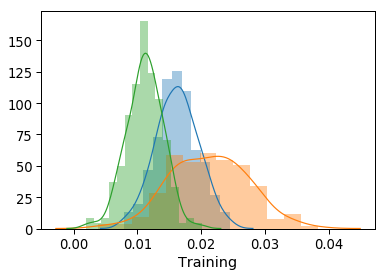

In [36]:
sns.distplot(acc_meas.Overall, label='Overall')
sns.distplot(acc_meas.Test, label='Test')
sns.distplot(acc_meas.Training, label='Training')

In [37]:
print np.mean(acc_meas.Training), np.mean(acc_meas.Training < 0)
print np.mean(acc_meas.Test), np.mean(acc_meas.Test < 0)

0.0111809593023 0.0
0.0212548449612 0.0


In [38]:
# here we do signficiance testing to show whether there is a benefit to generalization

comp_df = pd.DataFrame(exp_2_goals_acc)
# batch_v = comp_df.Batch
training_v = comp_df.Condition == 'Training'
acc_meas = []
for ii in set(comp_df.Batch):
    # get the accuracy of the Joint and flat models in each condition
    b = comp_df.Batch == ii
    acc_meas.append({
        'Overall': comp_df.loc[b & (comp_df.Model == 'Joint'), 'Acc'].mean() - \
                   comp_df.loc[b & (comp_df.Model == 'Independent'), 'Acc'].mean(),
        'Training':comp_df.loc[b & (comp_df.Model == 'Joint') & training_v, 'Acc'].mean() - \
                   comp_df.loc[b & (comp_df.Model == 'Independent') & training_v, 'Acc'].mean(),
        'Test':comp_df.loc[b & (comp_df.Model == 'Joint') & (training_v==False), 'Acc'].mean() - \
               comp_df.loc[b & (comp_df.Model == 'Independent') & (training_v==False), 'Acc'].mean(),
        'batch': ii
        
    })
    
acc_meas = pd.DataFrame(acc_meas)

print np.mean(acc_meas.Training), np.mean(acc_meas.Training < 0)
print np.mean(acc_meas.Test), np.mean(acc_meas.Test < 0)

0.0233890503876 0.0
0.00337451550388 0.205


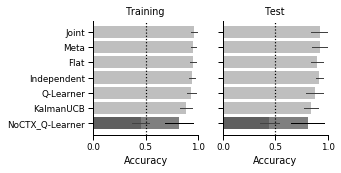

In [39]:
with sns.plotting_context('paper', font_scale=1.0):
    order = pd.DataFrame(exp_2_goals_acc).groupby(['Condition', 'Model']
            ).mean().loc['Training'].sort_values('Acc', ascending=False)

    g = sns.catplot(data=pd.DataFrame(exp_2_goals_acc),
                y='Model', x='Acc', ci='sd', col='Condition',
                col_order=['Training', 'Test'],
                kind='bar', orient='h', color=[0.75, 0.75, 0.75], height=2.5, 
                aspect=1., order=order.index, errwidth=1.0,
                   )

    plt.ylabel('')
    plt.xlim([0, 1])
    for ii in [0, 1]:
        g.axes[0][ii].set_xlabel('Accuracy')
        g.axes[0][ii].axvline(x=0.5, c='k', ls=':')
    df0 = sims_exp_4.groupby(['Model']).mean().sort_values('Acc')

    g.axes[0][0].set_ylabel('')

    g.axes[0][0].set_title('Training')
    g.axes[0][1].set_title('Test')

    for ax, _bool in zip(g.axes[0], [True, False]):
        mu = exp_2_goals_subj[
            (exp_2_goals_subj['In Goal']) & (_bool == exp_2_goals_subj['Training'])
        ].groupby('subj').mean().mean()['Accuracy']
        std = exp_2_goals_subj[
            exp_2_goals_subj['In Goal'] & (_bool == exp_2_goals_subj['Training'])
        ].groupby('subj').mean().std()['Accuracy'] 


        ax.barh([6.0], [mu], facecolor='k', alpha=0.5 )
        ax.plot([mu-std, mu+std], [6., 6.], c='k', lw=1)

    plt.ylabel('')
    plt.xlim([0, 1])
    plt.xlabel('Accuracy')

    g.axes[0][0].set_yticks(range(0, 7))
    g.axes[0][0].set_yticklabels(order.index.to_list() + ['Subjects'])



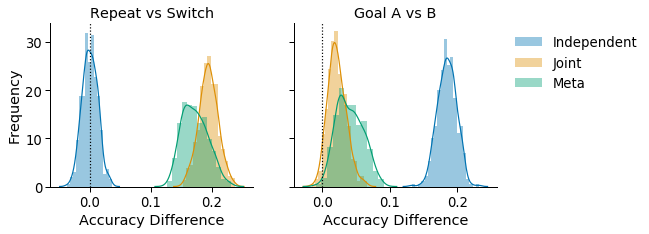

In [40]:
taskA = stats_exp_2_goals.Task == 'A'
goalA = stats_exp_2_goals['Correct Goal'] == 'A'
model = stats_exp_2_goals.Model
cc = sns.color_palette('colorblind')

_, axes = plt.subplots(1, 2, figsize=(8, 3), sharey=True)

def plot_dist(m_name, ii):
    sns.distplot(stats_exp_2_goals.loc[(~taskA) & (model == m_name), 'Acc'].values - \
                 stats_exp_2_goals.loc[(taskA) & (model == m_name), 'Acc'].values, label=m_name, color=cc[ii],
                ax=axes[0])

plot_dist('Independent', 0)
plot_dist('Joint', 1)
plot_dist('Meta', 2)

def plot_dist(m_name, ii):
    sns.distplot(stats_exp_2_goals.loc[(goalA) & (model == m_name), 'Acc'].values - \
                 stats_exp_2_goals.loc[(~goalA) & (model == m_name), 'Acc'].values, label=m_name, color=cc[ii],
                ax=axes[1])

plot_dist('Independent', 0)
plot_dist('Joint', 1)
plot_dist('Meta', 2)

axes[1].legend(loc='upper right', bbox_to_anchor=(2.0, 1.0))
axes[0].set_ylabel('Frequency')
axes[0].set_xlabel('Accuracy Difference')
axes[0].set_title('Repeat vs Switch')

axes[1].set_xlabel('Accuracy Difference')
axes[1].set_title('Goal A vs B')
sns.despine()


lgd = axes[1].legend(loc='upper right', bbox_to_anchor=(1.75, 1.0), framealpha=0)

for ii in [0, 1]: axes[ii].axvline(x=0, ls=':', color='k') 

plt.savefig('exp_2_goals_effect_size_genonly.png', dpi=300,bbox_extra_artists=(lgd,),
            bbox_inches='tight')



# Experiment 2: Independent Structure

In [41]:
def get_hdi_exp4goals(df, model, comparison, hdi=0.95):
    v = df.loc[(df.Model==model) & (df.Comparison == comparison), 'Mean'].values
    return get_hdi(v, hdi)

def get_mean_exp_4_goals(df, model, comparison, hdi=0.95):
    tail = (1. - hdi) / 2
    v = df.loc[(df.Model==model) & (df.Comparison == comparison), 'Mean'].values
    return v.mean()

def score_acc_4_goals(sampled_batch, batch=0):
    accuracy = list()
    
    df0 = sampled_batch[sampled_batch['In Goal']].copy()
    for m in set(df0.Model):
        for it in set(df0.Iteration):
            subj_df = df0.loc[(df0.Model == m) & (df0.Iteration == it), :]
            accuracy.append({
                'Condition': 'Training',
                'Acc': subj_df.loc[subj_df.Context < 7, 'Acc'].mean(),
                'Iteration': it,
                'Model': m,
                'Batch': ii,
            })
            accuracy.append({
                'Condition': 'Test',
                'Acc': subj_df.loc[subj_df.Context >= 7, 'Acc'].mean(),
                'Iteration': it,
                'Model': m,
                'Batch': ii,
            })
    return accuracy
            


def score_experiment_4_goals(sampled_batch):
  
    df0 = sampled_batch[sampled_batch['In Goal'] 
                  & (sampled_batch.Context >= 7) 
                 ].copy()
    
    score = list()
    for m in set(df0.Model):
        for it in set(df0.Iteration):
            subj_df = df0.loc[(df0.Model == m) & (df0.Iteration == it), :]

            a = (subj_df.Context == 7)
            b = (subj_df.Context == 8)
            diff_1 = subj_df.loc[a, :].groupby('Times Seen Context').mean()['Acc'] - \
                subj_df.loc[b, :].groupby('Times Seen Context').mean()['Acc']

            a = (subj_df.Context == 7) | (subj_df.Context == 8)
            b = (subj_df.Context == 9) | (subj_df.Context == 10)
            diff_2 =subj_df.loc[a, :].groupby('Times Seen Context').mean()['Acc'] - \
                subj_df.loc[b, :].groupby('Times Seen Context').mean()['Acc']

            a = (subj_df.Context == 9)
            b = (subj_df.Context == 10)
            diff_3 = \
                subj_df.loc[a, :].groupby('Times Seen Context').mean()['Acc'] - \
                subj_df.loc[b, :].groupby('Times Seen Context').mean()['Acc']


            n = len(diff_1)
            for t in range(len(diff_1)):
                score.append({
                            'Trials in Context': t,
                            'Comparison': 'T1 vs T2',
                            'Difference Score': diff_1.values[t],
                            'Iteration': it,
                            'Model': m,
                    })
                
            for t in range(len(diff_2)):
                score.append({
                            'Trials in Context': t,
                            'Comparison': 'T1+2 vs T3+4',
                            'Difference Score': diff_2.values[t],
                            'Iteration': it,
                            'Model': m,
                    })
                
            for t in range(len(diff_3)):
                score.append({
                            'Trials in Context': t,
                            'Comparison': 'T3 vs T4',
                            'Difference Score': diff_3.values[t],
                            'Iteration': it,
                            'Model': m,
                    })
                

    return pd.DataFrame(score) 

In [42]:
stats_exp_4_goals = []

n_batches = 200
# n_batches = 5
hdi_interval = 0.95

goal_counts_exp_4_goals = []
exp_4_goals_acc = []

for ii in tnrange(n_batches):
    batched_data = draw_batch(sims_exp_4, batch_size=114)
    
    # count the goals tried in the first trial of each test context
    gcd = batched_data[batched_data['In Goal'] & (batched_data.Context > 6) & 
                   (batched_data['Times Seen Context'] == 1) 
                      ].copy()
    gcd['Map'] = ['1'] * len(gcd)
    gcd.loc[(gcd.Context == 7) | (gcd.Context == 8), 'Map'] = 1
    gcd.loc[(gcd.Context == 9) | (gcd.Context == 10), 'Map'] = 2
    gcd['Sample'] = ii

    # Because "In Goal" is a boolean that is always true here, we count that
    goal_counts_exp_4_goals.append(
        gcd.groupby(['Model', 'Map', 'Chosen Goal']).count()['In Goal'].reset_index()
    )
    
    
    # get the difference scores
    scored = score_experiment_4_goals(batched_data)
    stats_exp_4_goals += get_diff_stats(scored, idx=ii)
    
    # get the overall accuracy
    exp_4_goals_acc += score_acc_4_goals(batched_data, batch=ii)
    
stats_exp_4_goals = pd.DataFrame(stats_exp_4_goals)
goal_counts_exp_4_goals = pd.concat(goal_counts_exp_4_goals)

/Users/nicholasfranklin/anaconda3/envs/comp_gen/lib/python2.7/site-packages/ipykernel_launcher.py:10: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  # Remove the CWD from sys.path while we load stuff.


In [43]:
# load subject data for the accuracy comparison

exp_4_goals_subj = pd.read_pickle(file_folder + '/exp2_data.pkl')

# exclude! ...
excluded = generate_exclusion_list(
    exp_4_goals_subj, training_contexts=7, goal_chance=1/4.)
for e in excluded:
    exp_4_goals_subj = exp_4_goals_subj[exp_4_goals_subj.subj != e]
uids = list(set(exp_4_goals_subj.subj))
exp_4_goals_subj['Accuracy'] = exp_4_goals_subj['Reward'] / 10.0
exp_4_goals_subj['Training'] = exp_4_goals_subj.loc[:, 'Context'] < 8


100%|██████████| 148/148 [01:18<00:00,  1.89it/s]


N clusters = 2, Covarainace = diag


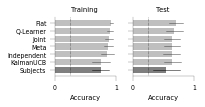

In [44]:
with sns.plotting_context('paper', font_scale=0.7):


    order = pd.DataFrame(exp_4_goals_acc)[
        pd.DataFrame(exp_4_goals_acc)['Model'] != "NoCTX_Q-Learner"].groupby(['Condition', 'Model']
                ).mean().loc['Training'].sort_values('Acc', ascending=False)

    g = sns.catplot(data=pd.DataFrame(exp_4_goals_acc),
                y='Model', x='Acc', ci='sd', col='Condition',
                col_order=['Training', 'Test'],
                kind='bar', orient='h', color=[0.75, 0.75, 0.75], height=1.5, 
                aspect=1., order=order.index, errwidth=0.5,
                   )

    plt.ylabel('')
    plt.xlim([0, 1])
    for ii in [0, 1]:
        g.axes[0][ii].set_xlabel('Accuracy')
        g.axes[0][ii].axvline(x=0.25, c='k', ls=':', lw=0.5)
    df0 = sims_exp_4.groupby(['Model']).mean().sort_values('Acc')

    g.axes[0][0].set_ylabel('')

    g.axes[0][0].set_title('Training')
    g.axes[0][1].set_title('Test')

    for ax, _bool in zip(g.axes[0], [True, False]):
        mu = exp_4_goals_subj[
            (exp_4_goals_subj['In Goal']) & (_bool == exp_4_goals_subj['Training'])
        ].groupby('subj').mean().mean()['Accuracy']
        std = exp_4_goals_subj[
            exp_4_goals_subj['In Goal'] & (_bool == exp_4_goals_subj['Training'])
        ].groupby('subj').mean().std()['Accuracy'] 


        ax.barh([6.0], [mu], facecolor='k', alpha=0.5 )
        ax.plot([mu-std, mu+std], [6., 6.], c='k', lw=0.5)

    plt.ylabel('')
    plt.xlim([0, 1])
    plt.xlabel('Accuracy')
            
    for ax in g.axes[0]:
        ax.spines['left'].set_lw(0.2)
        ax.spines['bottom'].set_lw(0.2)
        ax.tick_params(width=0.2)

    g.axes[0][0].set_yticks(range(0, 7))
    g.axes[0][0].set_yticklabels(order.index.to_list() + ['Subjects'])

    plt.savefig('exp_4_goals_acc.png', dpi=300)

In [45]:
pd.DataFrame(exp_4_goals_acc).groupby(['Condition', 'Model', 'Batch'
                                      ]).mean().groupby(['Condition', 'Model']).mean()

Acc    Iteration
Condition Model                                 
Test      Flat             0.711336  1253.466535
          Independent      0.635592  1253.466535
          Joint            0.639779  1253.466535
          KalmanUCB        0.648887  1253.466535
          Meta             0.641774  1253.466535
          NoCTX_Q-Learner  0.227237  1253.466535
          Q-Learner        0.679907  1253.466535
Training  Flat             0.923094  1253.466535
          Independent      0.856584  1253.466535
          Joint            0.887552  1253.466535
          KalmanUCB        0.756035  1253.466535
          Meta             0.878210  1253.466535
          NoCTX_Q-Learner  0.243553  1253.466535
          Q-Learner        0.909980  1253.466535

In [46]:
diff_test = pd.DataFrame(exp_4_goals_acc).groupby(['Condition', 'Model', 'Batch'
                                      ]).mean().loc['Test'].loc['Flat', 'Acc'] - \
    pd.DataFrame(exp_4_goals_acc).groupby(['Condition', 'Model', 'Batch'
                                      ]).mean().loc['Test'].loc['Meta', 'Acc']
print np.mean(diff_test), ttest_1samp(diff_test, 0)

0.0695614035088 Ttest_1sampResult(statistic=65.36026974711717, pvalue=1.9173888468824036e-136)


In [47]:
diff_test = pd.DataFrame(exp_4_goals_acc).groupby(['Condition', 'Model', 'Batch'
                                      ]).mean().loc['Training'].loc['Flat', 'Acc'] - \
    pd.DataFrame(exp_4_goals_acc).groupby(['Condition', 'Model', 'Batch'
                                      ]).mean().loc['Training'].loc['Joint', 'Acc']
print np.mean(diff_test), ttest_1samp(diff_test, 0)

0.0355419407895 Ttest_1sampResult(statistic=87.66610063960869, pvalue=5.823230274227199e-161)


In [48]:
stats_exp_4_goals['Power'] = (stats_exp_4_goals['p-value'].copy() < 0.05)
stats_exp_4_goals.groupby(['Model', 'Comparison']).mean()

Mean  Sample   d-prime     df       p-value  \
Model           Comparison                                                      
Flat            T1 vs T2     -0.004247    99.5 -0.012963  113.0  4.829158e-01   
                T1+2 vs T3+4 -0.002840    99.5 -0.012506  113.0  5.071562e-01   
                T3 vs T4      0.002500    99.5  0.007351  113.0  4.755143e-01   
Independent     T1 vs T2      0.166798    99.5  0.508068  113.0  1.973797e-04   
                T1+2 vs T3+4  0.257091    99.5  1.035419  113.0  1.415954e-13   
                T3 vs T4     -0.002719    99.5 -0.009010  113.0  5.066047e-01   
Joint           T1 vs T2      0.000044    99.5 -0.000101  113.0  5.337838e-01   
                T1+2 vs T3+4  0.161363    99.5  0.627677  113.0  6.261988e-06   
                T3 vs T4     -0.119686    99.5 -0.349561  113.0  1.097513e-02   
KalmanUCB       T1 vs T2      0.004298    99.5  0.019239  113.0  4.715238e-01   
                T1+2 vs T3+4 -0.000464    99.5 -0.003053  113.0  5.243982e-01   
                T3 vs T4     -0.004028    99.5 -0.018858  113.0  5.219876e-01   
Meta            T1 vs T2      0.072953    99.5  0.237026  113.0  8.049226e-02   
                T1+2 vs T3+4  0.236378    99.5  0.937115  113.0  1.014274e-11   
                T3 vs T4     -0.068589    99.5 -0.216731  113.0  1.087745e-01   
NoCTX_Q-Learner T1 vs T2     -0.008019    99.5 -0.016565  113.0  4.609489e-01   
                T1+2 vs T3+4 -0.009452    99.5 -0.027241  113.0  4.778162e-01   
                T3 vs T4      0.005841    99.5  0.011837  113.0  4.984023e-01   
Q-Learner       T1 vs T2      0.006060    99.5  0.018692  113.0  4.983503e-01   
                T1+2 vs T3+4 -0.000654    99.5 -0.002677  113.0  4.952928e-01   
                T3 vs T4      0.001213    99.5  0.003141  113.0  5.202138e-01   

                              t-statistic  Power  
Model           Comparison                        
Flat            T1 vs T2        -0.137794  0.065  
                T1+2 vs T3+4    -0.132936  0.060  
                T3 vs T4         0.078145  0.065  
Independent     T1 vs T2         5.400840  1.000  
                T1+2 vs T3+4    11.006659  1.000  
                T3 vs T4        -0.095774  0.050  
Joint           T1 vs T2        -0.001073  0.025  
                T1+2 vs T3+4     6.672298  1.000  
                T3 vs T4        -3.715879  0.940  
KalmanUCB       T1 vs T2         0.204512  0.065  
                T1+2 vs T3+4    -0.032452  0.040  
                T3 vs T4        -0.200467  0.080  
Meta            T1 vs T2         2.519618  0.700  
                T1+2 vs T3+4     9.961674  1.000  
                T3 vs T4        -2.303881  0.640  
NoCTX_Q-Learner T1 vs T2        -0.176089  0.075  
                T1+2 vs T3+4    -0.289574  0.050  
                T3 vs T4         0.125833  0.055  
Q-Learner       T1 vs T2         0.198701  0.045  
                T1+2 vs T3+4    -0.028453  0.040  
                T3 vs T4         0.033385  0.050

In [49]:
hdi = []
std_error = stats_exp_4_goals.groupby(['Model', 'Comparison']).std()['Mean']

for comparison in set(stats_exp_4_goals.Comparison):
    for model in set(stats_exp_4_goals.Model):
        lb, ub = get_hdi_exp4goals(stats_exp_4_goals, model, comparison, hdi=hdi_interval)
        hdi.append({
            'Comparison': comparison,
            'Model': model,
            'Mean': get_mean_exp_4_goals(stats_exp_4_goals, model, comparison),
            'Lower Bound': lb,
            'Upper Bound': ub,
            'Std Error': std_error.loc[model][comparison]
        })
hdi_data_exp_4_goals = pd.DataFrame(hdi)
# hdi_data_exp_4_goals

In [50]:
hdi_data_exp_4_goals.loc[(hdi_data_exp_4_goals.Model == 'Q-Learner') & 
                         (hdi_data_exp_4_goals.Comparison == 'T1 vs T2'), 'Mean'].values[-1]

0.0060599415204678365

In [51]:
hdi_data_exp_4_goals.sort_values(['Comparison', 'Model'])[['Comparison', 'Model','Mean', 'Lower Bound',
                                                         'Upper Bound', 'Std Error']]

,Comparison,Model,Mean,Lower Bound,Upper Bound,Std Error
1,T1 vs T2,Flat,-0.004247,-0.061404,0.062865,0.032057
3,T1 vs T2,Independent,0.166798,0.105263,0.220760,0.030100
4,T1 vs T2,Joint,0.000044,-0.048246,0.051170,0.026744
6,T1 vs T2,KalmanUCB,0.004298,-0.033626,0.055556,0.022689
5,T1 vs T2,Meta,0.072953,0.014620,0.131579,0.028741
2,T1 vs T2,NoCTX_Q-Learner,-0.008019,-0.099415,0.090643,0.049134
0,T1 vs T2,Q-Learner,0.006060,-0.051170,0.071637,0.030380
15,T1+2 vs T3+4,Flat,-0.002840,-0.045322,0.040205,0.021709
17,T1+2 vs T3+4,Independent,0.257091,0.212719,0.302632,0.022401
18,T1+2 vs T3+4,Joint,0.161363,0.113304,0.206140,0.023052


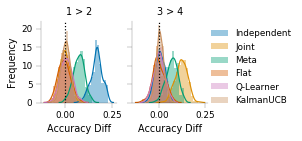

In [52]:
comp1 = stats_exp_4_goals.Comparison =='T1 vs T2'
comp2 = stats_exp_4_goals.Comparison =='T3 vs T4'
model = stats_exp_4_goals.Model
cc = sns.color_palette('colorblind')

with sns.plotting_context('paper', font_scale=1.0):
    _, axes = plt.subplots(1, 2, figsize=(3, 1.5), sharey=True)
    def plot_dist(m_name, ii):
            sns.distplot(stats_exp_4_goals.loc[(comp1) & (model == m_name), 'Mean'].values, label=m_name, color=cc[ii],
                        ax=axes[0])

    plot_dist('Independent', 0)
    plot_dist('Joint', 1)
    plot_dist('Meta', 2)
    plot_dist('Flat', 3)
    plot_dist('Q-Learner', 4)
    plot_dist('KalmanUCB', 5)

    def plot_dist(m_name, ii):
        sns.distplot(-1 * stats_exp_4_goals.loc[(comp2) & (model == m_name), 'Mean'].values, label=m_name, color=cc[ii],
                    ax=axes[1])

    plot_dist('Independent', 0)
    plot_dist('Joint', 1)
    plot_dist('Meta', 2)
    plot_dist('Flat', 3)
    plot_dist('Q-Learner', 4)
    plot_dist('KalmanUCB', 5)


    axes[0].set_ylabel('Frequency')
    axes[0].set_xlabel('Accuracy Diff')
    axes[0].set_title('1 > 2')
    axes[0].set_yticks([0, 5, 10, 15, 20])

    axes[1].set_xlabel('Accuracy Diff')
    axes[1].set_title('3 > 4')
    sns.despine()
    
    for ax in axes:
        ax.spines['left'].set_lw(0.2)
        ax.spines['bottom'].set_lw(0.2)
        ax.tick_params(width=0.2)

    lgd = axes[1].legend(loc='upper right', bbox_to_anchor=(2.2, 1.00), framealpha=0)

    for ii in [0, 1]: axes[ii].axvline(x=0, ls=':', color='k') 

    plt.savefig('exp_4_goals_effect_size_all.png', dpi=300,bbox_extra_artists=(lgd,),
                bbox_inches='tight')



In [53]:



def main_effect_mean_sd(model, comp):
    v0 = stats_exp_4_goals.loc[
                (stats_exp_4_goals.Model == model) & 
                (stats_exp_4_goals.Comparison == comp) ,'Mean'].values
    return np.mean(v0), np.std(v0)

sns.set_context('paper', font_scale=1.75)
def plot_contrasts_exp_4_goals(model, model_name, hdi=0.95):
    with sns.axes_style('ticks'):
        fig, ax  = plt.subplots(figsize=(1.0, 2.5))  
        sns.barplot(x='Comparison', y='Mean', 
                data=hdi_data_exp_4_goals[
                    (hdi_data_exp_4_goals.Model == model) & 
                    ((hdi_data_exp_4_goals.Comparison =='T1 vs T2' ) |
                    (hdi_data_exp_4_goals.Comparison == 'T3 vs T4'))], color='skyblue', ax=ax, ci="sd",
                    order=['T1 vs T2',  'T3 vs T4'])
        
#         sns.barplot(x='Comparison', y='Mean', 
#                 data=hdi_data_exp_4_goals[hdi_data_exp_4_goals.Model == model], color='skyblue', ax=ax, 
#                     order=['T1 vs T2', 'T1+2 vs T3+4', 'T3 vs T4'])
        ax.set_ylabel(r'Difference Score', labelpad=-3)
        ax.set_xlabel('')
        ax.plot([-1, 2], [0, 0], 'k:')
        ax.set_xlim([-0.5, 1.5])
        ax.set_yticks(np.arange(-0.2, 0.35, 0.1))
        ax.set_ylim([-0.2, 0.35])
        sns.despine(offset=5)
        
        plt.xticks([0, 1], [r'1 > 2',  r'3 > 4' ], rotation='vertical')
        
        def plot_stars(x0):
            ax.annotate("*", xy=(x0-0.29, 0.28), size=22)
        
        # plot the error bars
        # plot the error bars
        mu, sd = main_effect_mean_sd(model, 'T1 vs T2')
        lb, ub = get_hdi_exp4goals(stats_exp_4_goals, model, 'T1 vs T2', hdi)
        ax.plot([0, 0],[mu-sd, mu+sd], 'k', lw=2)
        if np.sign(lb) == np.sign(ub):
            plot_stars(0)


        mu, sd = main_effect_mean_sd(model, 'T3 vs T4')
        lb, ub = get_hdi_exp4goals(stats_exp_4_goals, model, 'T3 vs T4', hdi)
        ax.plot([1, 1],[mu-sd, mu+sd], 'k', lw=2)



        if np.sign(lb) == np.sign(ub):
            plot_stars(1)
        
        ax.set_title(model_name)
        return fig, ax
    



def plot_contrasts_exp_4_goals_to_save(model, model_name, height=1.2, hdi=0.95):
    with sns.plotting_context('paper', font_scale=1):
        with sns.axes_style('ticks'):
            fig, ax  = plt.subplots(figsize=(height/2.5, height))
            
            sns.barplot(x='Comparison', y='Mean', 
                    data=hdi_data_exp_4_goals[
                        (hdi_data_exp_4_goals.Model == model) & 
                        ((hdi_data_exp_4_goals.Comparison =='T1 vs T2' ) |
                        (hdi_data_exp_4_goals.Comparison == 'T3 vs T4'))], color='skyblue', ax=ax, ci="sd",
                        order=['T1 vs T2',  'T3 vs T4'])
            
            ax.set_ylabel(r'Difference Score', labelpad=0)
            ax.set_xlabel('')
            ax.plot([-1, 2], [0, 0], 'k:', lw=0.5)
            ax.set_xlim([-0.5, 1.5])
            ax.set_yticks(np.arange(-0.2, 0.35, 0.1))
            ax.set_ylim([-0.2, 0.35])
            sns.despine(offset=5)

            plt.xticks([0, 1], [r'1 > 2',  r'3 > 4' ], rotation='vertical')

            def plot_stars(x0):
                ax.annotate("*", xy=(x0-0.175, 0.25), size=8)

            # plot the error bars
            mu, sd = main_effect_mean_sd(model, 'T1 vs T2')
            lb, ub = get_hdi_exp4goals(stats_exp_4_goals, model, 'T1 vs T2', hdi)
            ax.plot([0, 0],[mu-sd, mu+sd], 'k', lw=0.5)
            if np.sign(lb) == np.sign(ub):
                plot_stars(0)


            mu, sd = main_effect_mean_sd(model, 'T3 vs T4')
            lb, ub = get_hdi_exp4goals(stats_exp_4_goals, model, 'T3 vs T4', hdi)
            ax.plot([1, 1],[mu-sd, mu+sd], 'k', lw=0.5)

            if np.sign(lb) == np.sign(ub):
                plot_stars(1)

            ax.set_title(model_name)
            ax.spines['left'].set_lw(0.2)
            ax.spines['bottom'].set_lw(0.2)
            ax.tick_params(width=0.2)


            
            return fig, ax
    
    



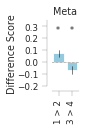

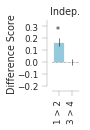

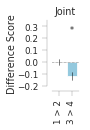

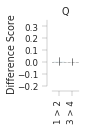

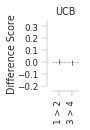

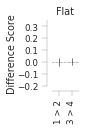

In [54]:
fig, _ = plot_contrasts_exp_4_goals_to_save('Meta', 'Meta')
fig.savefig('exp_4_goals_model_meta.png', dpi=300, bbox_inches='tight')
fig, _ = plot_contrasts_exp_4_goals_to_save('Independent', 'Indep.')
fig.savefig('exp_4_goals_model_indep.png', dpi=300, bbox_inches='tight')
fig, _ = plot_contrasts_exp_4_goals_to_save('Joint', 'Joint')
fig.savefig('exp_4_goals_model_joint.png', dpi=300, bbox_inches='tight')
fig, _ = plot_contrasts_exp_4_goals_to_save('Q-Learner', 'Q')
fig.savefig('exp_4_goals_model_q.png', dpi=300, bbox_inches='tight')
fig, _ = plot_contrasts_exp_4_goals_to_save('KalmanUCB', 'UCB')
fig.savefig('exp_4_goals_model_kal.png', dpi=300, bbox_inches='tight')
fig, _ = plot_contrasts_exp_4_goals_to_save('Flat', 'Flat')
fig.savefig('exp_4_goals_model_flat.png', dpi=300, bbox_inches='tight')



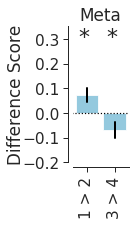

In [55]:
fig, _ = plot_contrasts_exp_4_goals('Meta', 'Meta', hdi=hdi_interval)


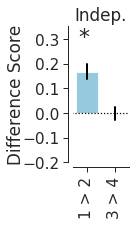

In [56]:
fig, _ = plot_contrasts_exp_4_goals('Independent', 'Indep.', hdi=0.9)


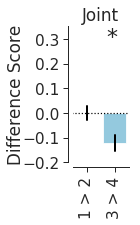

In [57]:
fig, _ = plot_contrasts_exp_4_goals('Joint', 'Joint', hdi=hdi_interval)


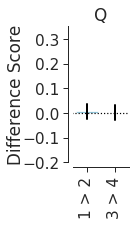

In [58]:
fig, _ = plot_contrasts_exp_4_goals('Q-Learner', 'Q', hdi=hdi_interval)


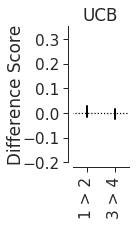

In [59]:
fig, _ = plot_contrasts_exp_4_goals('KalmanUCB', 'UCB', hdi=hdi_interval)


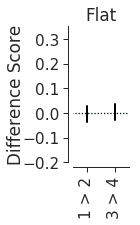

In [60]:
fig, _ = plot_contrasts_exp_4_goals('Flat', 'Flat', hdi=hdi_interval)



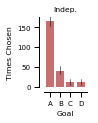

In [61]:
def plot_counts(model, title, map_, hdi=0.95):
    with sns.plotting_context('paper', font_scale=0.8):
        
        height = 1.75

        fig, ax = plt.subplots(1, 1, sharey=True, figsize=(2.0/2.5 * height, height))

        if map_ == 2:
            c = sns.color_palette('muted')[3]
        else:
            c = sns.color_palette('muted')[0]

        df0 = goal_counts_exp_4_goals[
            (goal_counts_exp_4_goals.Model == model) & (goal_counts_exp_4_goals.Map == map_)
        ]

        sns.barplot(x="Chosen Goal", y="In Goal", order='A B C D'.split(),
                    data=df0, ax=ax, color=c, ci=None)

        # get the HDI for each of the counts
        for x, g in enumerate('A B C D'.split()):
            mu = np.mean(get_hdi(df0.loc[df0['Chosen Goal'] == g, 'In Goal'].values))
            sd = np.std(get_hdi(df0.loc[df0['Chosen Goal'] == g, 'In Goal'].values))
            ax.plot([x, x],[mu-sd, mu+sd], 'k', lw=0.5)


        ax.set_ylabel('Times Chosen')
        ax.set_xlabel('Goal')
        ax.set_title(title)
        ax.set_yticks([0,50,100, 150])
        ax.set_ylim([0, 175])

        sns.despine(offset=5)
        plt.tight_layout()
        plt.subplots_adjust(wspace=0.4, hspace=0.4)
    
plot_counts('Independent', 'Indep.', map_=2, hdi=hdi_interval)
plt.savefig('exp_4_goals_model_indep_2.png', dpi=300, bbox_inches='tight')

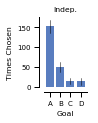

In [62]:
plot_counts('Independent', 'Indep.', map_=1, hdi=hdi_interval)
plt.savefig('exp_4_goals_model_indep_3.png', dpi=300, bbox_inches='tight')

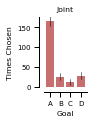

In [63]:
plot_counts('Joint', 'Joint', map_=2, hdi=hdi_interval)
plt.savefig('exp_4_goals_model_joint_2.png', dpi=300, bbox_inches='tight')

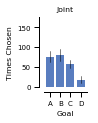

In [64]:
plot_counts('Joint', 'Joint', map_=1, hdi=hdi_interval)
plt.savefig('exp_4_goals_model_joint_3.png', dpi=300, bbox_inches='tight')

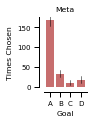

In [65]:
plot_counts('Meta', 'Meta', map_=2, hdi=hdi_interval)
plt.savefig('exp_4_goals_model_meta_2.png', dpi=300, bbox_inches='tight')

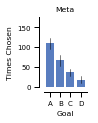

In [66]:
plot_counts('Meta', 'Meta', map_=1, hdi=hdi_interval)
plt.savefig('exp_4_goals_model_meta_3.png', dpi=300, bbox_inches='tight')

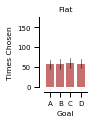

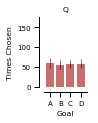

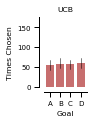

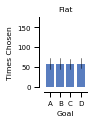

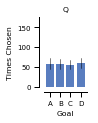

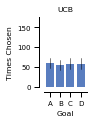

In [67]:
plot_counts('Flat', 'Flat', map_=2, hdi=hdi_interval)
plt.savefig('exp_4_goals_model_flat_2.png', dpi=300, bbox_inches='tight')
plot_counts('Q-Learner', 'Q', map_=2, hdi=hdi_interval)
plt.savefig('exp_4_goals_model_q_2.png', dpi=300, bbox_inches='tight')
plot_counts('KalmanUCB', 'UCB', map_=2, hdi=hdi_interval)
plt.savefig('exp_4_goals_model_ucb_2.png', dpi=300, bbox_inches='tight')


plot_counts('Flat', 'Flat', map_=1, hdi=hdi_interval)
plot_counts('Q-Learner', 'Q', map_=1, hdi=hdi_interval)
plot_counts('KalmanUCB', 'UCB', map_=1, hdi=hdi_interval)



In [68]:
# def get_goal_diff_score(model, _map):
#     diff_score = []

#     for ii in range(n_batches):
#         vec =         (goal_counts_exp_4_goals.Model == model) &\
#             (goal_counts_exp_4_goals.Map == _map) & \
#             (goal_counts_exp_4_goals.Batch == ii)
#         A = goal_counts_exp_4_goals.loc[vec & (goal_counts_exp_4_goals['Chosen Goal'] == 'A'), 'In Goal'].values[0]
#         B = goal_counts_exp_4_goals.loc[vec & (goal_counts_exp_4_goals['Chosen Goal'] == 'B'), 'In Goal'].values[0]
#         C = goal_counts_exp_4_goals.loc[vec & (goal_counts_exp_4_goals['Chosen Goal'] == 'C'), 'In Goal'].values[0]
#         diff_score.append(A - 0.5 * (B + C))
#     return np.array(diff_score)

# with sns.plotting_context('talk'):
#     sns.distplot(get_goal_diff_score('Joint', 1), label='Joint')
#     sns.distplot(get_goal_diff_score('Independent', 1), label='Indep.')
#     sns.distplot(get_goal_diff_score('Meta', 1), label='Meta')
#     plt.legend()
#     plt.axvline(x=0, ls=':')
#     sns.despine()
    
#     plt.figure()
#     sns.distplot(get_goal_diff_score('Joint', 2), label='Joint')
#     sns.distplot(get_goal_diff_score('Independent', 2), label='Indep.')
#     sns.distplot(get_goal_diff_score('Meta', 2), label='Meta')
#     plt.legend()
#     plt.axvline(x=0, ls=':')
#     sns.despine()

In [69]:
# # there are 6 models, 4 Goals and 2 Maps, or 48 rows per batch
# batch_id = [[ii] * 48 for ii in range (n_batches)]
# goal_counts_exp_4_goals['Batch'] = np.concatenate(batch_id)

# def plot_counts_effectsize(model, title, hdi=0.95):
#     with sns.plotting_context('paper', font_scale=0.8):
        
# #         height = 1.75

#         fig, ax = plt.subplots(1, 1, sharey=True)

#         if map_ == 2:
#             c = sns.color_palette('muted')[3]
#         else:
#             c = sns.color_palette('muted')[0]

#         df0 = goal_counts_exp_4_goals[
#             (goal_counts_exp_4_goals.Model == model) & (goal_counts_exp_4_goals.Map == map_)
#         ]

#         sns.barplot(x="Chosen Goal", y="In Goal", order='A B C D'.split(),
#                     data=df0, ax=ax, color=c, ci=None)

#         # get the HDI for each of the counts
#         for x, g in enumerate('A B C D'.split()):
#             mu = np.mean(get_hdi(df0.loc[df0['Chosen Goal'] == g, 'In Goal'].values))
#             sd = np.std(get_hdi(df0.loc[df0['Chosen Goal'] == g, 'In Goal'].values))
#             ax.plot([x, x],[mu-sd, mu+sd], 'k', lw=0.5)


#         ax.set_ylabel('Times Chosen')
#         ax.set_xlabel('Goal')
#         ax.set_title(title)
#         ax.set_yticks([0,50,100, 150])
#         ax.set_ylim([0, 175])

#         sns.despine(offset=5)
#         plt.tight_layout()
# #         plt.subplots_adjust(wspace=0.4, hspace=0.4)
        
# plot_counts_effectsize('Joint', 'Joint', map_=2, hdi=hdi_interval)



# Experiment 3: Ambigous Enviornment (3 Goals)

In [70]:
def score_experiment_3_goals(sampled_batch):
  
    df0 = sampled_batch[
            sampled_batch['In Goal'] & 
            (sampled_batch.Context > 4) & 
            (sampled_batch['Times Seen Context'] <= 5)
             ].copy()

    
    score = list()
    for m in set(df0.Model):
        for it in set(df0.Iteration):
            subj_df = df0.loc[(df0.Model == m) & (df0.Iteration == it), :]

            a = (subj_df.Context == 5)
            b = (subj_df.Context == 8) 
            diff_1 = subj_df.loc[a, :].groupby('Times Seen Context').mean()['Acc'] - \
                subj_df.loc[b, :].groupby('Times Seen Context').mean()['Acc']

            a = (subj_df.Context == 6)
            b = (subj_df.Context == 7) 
            diff_2 =subj_df.loc[a, :].groupby('Times Seen Context').mean()['Acc'] - \
                subj_df.loc[b, :].groupby('Times Seen Context').mean()['Acc']

            a = (subj_df.Context == 5) | (subj_df.Context == 8)
            b = (subj_df.Context == 6) | (subj_df.Context == 7)
            diff_3 = \
                subj_df.loc[a, :].groupby('Times Seen Context').mean()['Acc'] - \
                subj_df.loc[b, :].groupby('Times Seen Context').mean()['Acc']

            n = len(diff_1)
            score.append(pd.DataFrame({
                        'Trials in Context': range(n),
                        'Comparison': ['T1 vs T4'] * n,
                        'Difference Score': diff_1,
                        'Iteration': [it] * n,
                        'Model': [m] * n,
                }))
            score.append(pd.DataFrame({
                        'Trials in Context': range(n),
                        'Comparison': ['T2 vs T3'] * n,
                        'Difference Score': diff_2,
                        'Iteration': [it] * n,
                        'Model': [m] * n,
                }))
            score.append(pd.DataFrame({
                        'Trials in Context': range(n),
                        'Comparison': ['T1/4 vs T2/3'] * n,
                        'Difference Score': diff_3,
                        'Iteration': [it] * n,
                        'Model': [m] * n,
                }))

    return pd.concat(score) 

def score_acc_3_goals(sampled_batch, batch=0):
    accuracy = list()
    
    df0 = sampled_batch[sampled_batch['In Goal']].copy()
    for m in set(df0.Model):
        for it in set(df0.Iteration):
            subj_df = df0.loc[(df0.Model == m) & (df0.Iteration == it), :]
            accuracy.append({
                'Condition': 'Training',
                'Acc': subj_df.loc[subj_df.Context < 5, 'Acc'].mean(),
                'Iteration': it,
                'Model': m,
                'Batch': ii,
            })
            accuracy.append({
                'Condition': 'Test',
                'Acc': subj_df.loc[subj_df.Context >= 5, 'Acc'].mean(),
                'Iteration': it,
                'Model': m,
                'Batch': ii,
            })
    return accuracy

In [71]:
indep = scored.loc[scored.Comparison=='T1 vs T4', 'Difference Score'].values
joint = scored.loc[scored.Comparison=='T2 vs T3', 'Difference Score'].values
indep.mean(), joint.mean()

/Users/nicholasfranklin/anaconda3/envs/comp_gen/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/nicholasfranklin/anaconda3/envs/comp_gen/lib/python2.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(nan, nan)

In [72]:
set(scored.Model)

{'Flat',
 'Independent',
 'Joint',
 'KalmanUCB',
 'Meta',
 'NoCTX_Q-Learner',
 'Q-Learner'}

In [73]:

n_batches = 200
hdi_interval = 0.95

stats_exp_3_goals = []

exp_3_goals_acc = []

correfs_meta = []
correfs_mixd = []

conj_meta = []
conj_mixd = []

aconj_meta = []
aconj_mixd = []

for ii in tnrange(n_batches):
    batched_data = draw_batch(sims_exp_3, batch_size=114)
    
    # get the difference scores
    scored = score_experiment_3_goals(batched_data)
    stats_exp_3_goals += get_diff_stats(scored, idx=ii)
    exp_3_goals_acc += score_acc_3_goals(batched_data, batch=ii)
    
    # run some extra analyes
    model = scored.Model == 'Meta'
    ind_comp = scored.Comparison=='T1 vs T4'
    joi_comp = scored.Comparison=='T2 vs T3'
    indep = scored.loc[ind_comp & model].groupby('Iteration').sum()['Difference Score'].values
    joint = scored.loc[joi_comp & model].groupby('Iteration').sum()['Difference Score'].values
    correfs_meta.append(np.corrcoef(indep, joint)[0][1])
    conj_meta.append(np.mean((indep > 0) & (joint > 0)))
    aconj_meta.append(np.mean(((indep > 0) & (joint <= 0)) | ((indep <= 0) & (joint > 0))))


    # split the into two
    subjs = list(set(scored.loc[model, 'Iteration']))[114/2:]
    subjs = np.array([ii in subjs for ii in scored.Iteration.to_list()])
    model = scored.Model == 'Joint'
    indep = scored.loc[ind_comp & model & subjs].groupby('Iteration').sum()['Difference Score'].values
    joint = scored.loc[joi_comp & model & subjs].groupby('Iteration').sum()['Difference Score'].values
    
    subjs = list(set(scored.loc[model, 'Iteration']))[:114/2]
    subjs = np.array([ii in subjs for ii in scored.Iteration.to_list()])
    model = scored.Model == 'Independent'
    indep = np.concatenate([indep,
        scored.loc[ind_comp & model & subjs].groupby('Iteration').sum()['Difference Score'].values])
    joint = np.concatenate([joint,                   
        scored.loc[joi_comp & model & subjs].groupby('Iteration').sum()['Difference Score'].values])
    correfs_mixd.append(np.corrcoef(indep, joint)[0][1])
    conj_mixd.append(np.mean((indep > 0) & (joint > 0)))
    aconj_mixd.append(np.mean(((indep > 0) & (joint <= 0)) | ((indep <= 0) & (joint > 0))))
    
stats_exp_3_goals = pd.DataFrame(stats_exp_3_goals)


/Users/nicholasfranklin/anaconda3/envs/comp_gen/lib/python2.7/site-packages/ipykernel_launcher.py:18: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`


In [74]:
model = scored.Model == 'Meta'
indep = scored.loc[(scored.Comparison=='T1 vs T4') & model].groupby('Iteration').sum()['Difference Score'].values
joint = scored.loc[(scored.Comparison=='T2 vs T3') & model].groupby('Iteration').sum()['Difference Score'].values
# correfs_meta.append(np.corrcoef(indep, joint)[0][1])
# conj_meta.append(np.mean((indep > 0) & (joint > 0)))

In [75]:
np.corrcoef(indep, joint)[0][1]

-0.14968844277566085

-0.06550881211863556
-0.18124890722309034
0.855
0.98


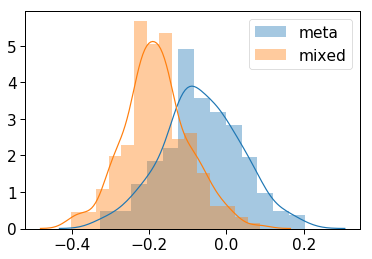

In [76]:
sns.distplot(correfs_meta, label='meta')
sns.distplot(correfs_mixd, label='mixed')
plt.legend()
print(np.mean(correfs_meta))
print(np.mean(correfs_mixd))
print(np.mean(np.array(correfs_mixd) <np.array(correfs_meta)))
print(np.mean(np.array(correfs_mixd) <0))

In [77]:
np.mean(np.sort(np.array(correfs_meta)) < 0)

0.735

In [78]:
np.mean(np.sort(np.array(correfs_meta)))

-0.06550881211863557

0.2632894736842106
0.23517543859649123
0.69


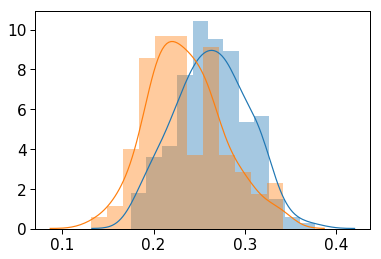

In [79]:
sns.distplot(conj_meta)
sns.distplot(conj_mixd)
print(np.mean(conj_meta))
print(np.mean(conj_mixd))
print(np.mean(np.array(conj_meta) >np.array(conj_mixd)))

In [80]:
np.array(conj_meta).mean()

0.2632894736842106

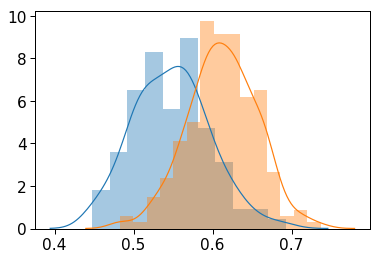

In [81]:
sns.distplot(aconj_meta)
sns.distplot(aconj_mixd)

In [82]:
np.mean(aconj_meta)

0.5476754385964913

In [83]:
exp_3_goals_subj = pd.read_pickle(file_folder + '/exp1_data.pkl')

# exclude! ...
excluded = generate_exclusion_list(exp_3_goals_subj, training_contexts=5, goal_chance=1/3.)
for e in excluded:
    exp_3_goals_subj = exp_3_goals_subj[exp_3_goals_subj.subj != e]
uids = list(set(exp_3_goals_subj.subj))
exp_3_goals_subj['Accuracy'] = exp_3_goals_subj['Reward'] / 10.0
exp_3_goals_subj['Training'] = exp_3_goals_subj.loc[:, 'Context'] < 6
exp_3_goals_acc = pd.DataFrame(exp_3_goals_acc)



100%|██████████| 149/149 [01:05<00:00,  2.28it/s]


N clusters = 2, Covarainace = diag


In [84]:
# with sns.plotting_context('paper', font_scale=0.5):


#     order = pd.DataFrame(exp_4_goals_acc).groupby(['Condition', 'Model']
#                 ).mean().loc['Training'].sort_values('Acc', ascending=False)

#     g = sns.catplot(data=pd.DataFrame(exp_4_goals_acc),
#                 y='Model', x='Acc', ci='sd', col='Condition',
#                 col_order=['Training', 'Test'],
#                 kind='bar', orient='h', color=[0.75, 0.75, 0.75], height=1.1, 
#                 aspect=1., order=order.index, errwidth=0.5,
#                    )

#     plt.ylabel('')
#     plt.xlim([0, 1])
#     for ii in [0, 1]:
#         g.axes[0][ii].set_xlabel('Accuracy')
#         g.axes[0][ii].axvline(x=0.25, c='k', ls=':', lw=0.5)
#     df0 = sims_exp_4.groupby(['Model']).mean().sort_values('Acc')

#     g.axes[0][0].set_ylabel('')

#     g.axes[0][0].set_title('Training')
#     g.axes[0][1].set_title('Test')

#     for ax, _bool in zip(g.axes[0], [True, False]):
#         mu = exp_4_goals_subj[
#             (exp_4_goals_subj['In Goal']) & (_bool == exp_4_goals_subj['Training'])
#         ].groupby('subj').mean().mean()['Accuracy']
#         std = exp_4_goals_subj[
#             exp_4_goals_subj['In Goal'] & (_bool == exp_4_goals_subj['Training'])
#         ].groupby('subj').mean().std()['Accuracy'] 


#         ax.barh([6.0], [mu], facecolor='k', alpha=0.5 )
#         ax.plot([mu-std, mu+std], [6., 6.], c='k', lw=0.5)

#     plt.ylabel('')
#     plt.xlim([0, 1])
#     plt.xlabel('Accuracy')
            
#     for ax in g.axes[0]:
#         ax.spines['left'].set_lw(0.2)
#         ax.spines['bottom'].set_lw(0.2)
#         ax.tick_params(width=0.2)

#     g.axes[0][0].set_yticks(range(0, 7))
#     g.axes[0][0].set_yticklabels(order.index.to_list() + ['Subjects'])

#     plt.savefig('exp_4_goals_acc.png', dpi=300)

In [85]:


pd.DataFrame(exp_3_goals_acc).groupby(['Condition', 'Model', 'Batch'
                                      ]).mean().groupby(['Condition', 'Model']).mean()

Acc    Iteration
Condition Model                                 
Test      Flat             0.855311  1249.294167
          Independent      0.830421  1249.294167
          Joint            0.827190  1249.294167
          KalmanUCB        0.766952  1249.294167
          Meta             0.825304  1249.294167
          NoCTX_Q-Learner  0.304330  1249.294167
          Q-Learner        0.829972  1249.294167
Training  Flat             0.954694  1249.294167
          Independent      0.941779  1249.294167
          Joint            0.945819  1249.294167
          KalmanUCB        0.826576  1249.294167
          Meta             0.944009  1249.294167
          NoCTX_Q-Learner  0.330023  1249.294167
          Q-Learner        0.944546  1249.294167

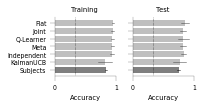

In [86]:

with sns.plotting_context('paper', font_scale=0.7):



    order = exp_3_goals_acc[exp_3_goals_acc.Model != "NoCTX_Q-Learner"
                           ].groupby(['Condition', 'Model']
                ).mean().loc['Training'].sort_values('Acc', ascending=False)

    g = sns.catplot(data=exp_3_goals_acc,
                y='Model', x='Acc', ci='sd', col='Condition',
                col_order=['Training', 'Test'],
                kind='bar', orient='h', color=[0.75, 0.75, 0.75], height=1.5, 
                aspect=1., order=order.index, errwidth=0.5
                   )
    plt.ylabel('')
    plt.xlim([0, 1])
    for ii in [0, 1]:
        g.axes[0][ii].set_xlabel('Accuracy')
        g.axes[0][ii].axvline(x=1./3, c='k', ls=':', lw=0.5)
    # df0 = sims_exp_3.groupby(['Model']).mean().sort_values('Acc')

    g.axes[0][0].set_ylabel('')

    g.axes[0][0].set_title('Training')
    g.axes[0][1].set_title('Test')


    for ax, _bool in zip(g.axes[0], ['Training', 'Test']):
        mu = exp_3_goals_acc[ (_bool == exp_3_goals_acc['Condition'])
        ].groupby('Iteration').mean().mean()['Acc']
        std = exp_3_goals_acc[ (_bool == exp_3_goals_acc['Condition'])
        ].groupby('Iteration').mean().std()['Acc'] 


        ax.barh([6.0], [mu], facecolor='k', alpha=0.5 )
        ax.plot([mu-std, mu+std], [6., 6.], c='k', lw=0.5)

    plt.ylabel('')
    plt.xlim([0, 1])
    plt.xlabel('Accuracy')
    
    for ax in g.axes[0]:
        ax.spines['left'].set_lw(0.2)
        ax.spines['bottom'].set_lw(0.2)
        ax.tick_params(width=0.2)


    g.axes[0][0].set_yticks(range(0, 7))
    g.axes[0][0].set_yticklabels(order.index.to_list() + ['Subjects'])
    plt.savefig('exp_3_goals_acc.png', dpi=300)

In [87]:
hdi_data_exp_3_goals = []
for comparison in set(stats_exp_3_goals.Comparison):
    for model in set(stats_exp_3_goals.Model):
        # can use the function from exp_4_goals without modification
        lb, ub = get_hdi_exp4goals(stats_exp_3_goals, model, comparison, hdi=hdi_interval)
        hdi_data_exp_3_goals.append({
            'Comparison': comparison,
            'Model': model,
            'Mean': get_mean_exp_4_goals(stats_exp_3_goals, model, comparison),  # don't need to rewrite function
            'Lower Bound': lb,
            'Upper Bound': ub
        })
hdi_data_exp_3_goals = pd.DataFrame(hdi_data_exp_3_goals)

In [88]:
hdi_data_exp_3_goals[['Comparison', 'Model', 'Mean', 'Lower Bound', 'Upper Bound']]

,Comparison,Model,Mean,Lower Bound,Upper Bound
0,T1/4 vs T2/3,Q-Learner,0.005412,-0.034211,0.051754
1,T1/4 vs T2/3,Flat,-0.001110,-0.035088,0.035088
2,T1/4 vs T2/3,NoCTX_Q-Learner,0.011632,-0.041228,0.074561
3,T1/4 vs T2/3,Independent,0.136632,0.116667,0.157018
4,T1/4 vs T2/3,Joint,0.131921,0.106140,0.161404
5,T1/4 vs T2/3,Meta,0.128996,0.103509,0.154386
6,T1/4 vs T2/3,KalmanUCB,-0.005456,-0.030702,0.021053
7,T1 vs T4,Q-Learner,-0.004482,-0.049123,0.040351
8,T1 vs T4,Flat,0.001193,-0.047368,0.054386
9,T1 vs T4,NoCTX_Q-Learner,0.011246,-0.096491,0.103509


In [89]:
def main_effect_mean_sd(model, comp):
    v0 = stats_exp_3_goals.loc[
                (stats_exp_3_goals.Model == model) & 
                (stats_exp_3_goals.Comparison == comp) ,'Mean'].values
    return np.mean(v0), np.std(v0)

def plot_contrasts_exp_3_goals(model, model_name, hdi=0.95):
    with sns.axes_style('ticks'):
        fig, ax  = plt.subplots(figsize=(1.0, 2.5))  
        sns.barplot(x='Comparison', y='Mean', 
                data=hdi_data_exp_3_goals[(hdi_data_exp_3_goals.Model == model) & 
                                         ((hdi_data_exp_3_goals.Comparison == 'T1 vs T4') | 
                                         (hdi_data_exp_3_goals.Comparison == 'T2 vs T3')
                                         )
                                         ], color='skyblue', ax=ax,
                    ci='sd',
                    order=['T1 vs T4', 'T2 vs T3', 'T1/4 vs T2/3'])
        
#         sns.barplot(x='Comparison', y='Mean', 
#                 data=hdi_data_exp_3_goals[hdi_data_exp_3_goals.Model == model], color='skyblue', ax=ax, 
#                     order=['T1 vs T4', 'T2 vs T3', 'T1/4 vs T2/3'])
        ax.set_ylabel(r'Difference Score', labelpad=-3)
        ax.set_xlabel('')
        ax.plot([-1, 2], [0, 0], 'k:')
        ax.set_xlim([-0.5, 1.5])
        ax.set_ylim([-.2, .25])
        ax.set_yticks(np.arange(-0.1, 0.351, 0.1))
        sns.despine(offset=5)
        
        plt.xticks([0, 1], [r'1 > 4', u'2 > 3', ], rotation='vertical')
        
        # plot the error bars (don't need to re-write function here)
        lb, ub = get_hdi_exp4goals(stats_exp_3_goals, model, 'T1 vs T4', hdi)
        ax.plot([0, 0],[lb, ub], 'k')
        def plot_stars(x0):
            ax.annotate("*", xy=(x0-0.29, 0.25), size=22)
        if np.sign(lb) == np.sign(ub):
            plot_stars(0)
        
        lb, ub = get_hdi_exp4goals(stats_exp_3_goals, model, 'T2 vs T3', hdi)
        ax.plot([1, 1],[lb, ub], 'k')
        if np.sign(lb) == np.sign(ub):
            plot_stars(1)

#         lb, ub = get_hdi_exp4goals(stats_exp_3_goals, model, 'T1/4 vs T2/3', hdi)
#         ax.plot([2, 2],[lb, ub], 'k')
#         if np.sign(lb) == np.sign(ub):
#             plot_stars(2)
        
        ax.set_title(model_name)
        return fig, ax
    
def plot_contrasts_exp_3_goals_to_save(model, model_name, height=1.2, hdi=0.95):
    with sns.plotting_context('paper', font_scale=1.0):
        with sns.axes_style('ticks'):
            fig, ax  = plt.subplots(figsize=(height/2.5, height))
            
            sns.barplot(x='Comparison', y='Mean', 
                    data=hdi_data_exp_3_goals[
                        (hdi_data_exp_3_goals.Model == model) & 
                        ((hdi_data_exp_3_goals.Comparison =='T1 vs T4' ) |
                        (hdi_data_exp_3_goals.Comparison == 'T2 vs T3'))], color='skyblue', ax=ax, ci="sd",
                        order=['T1 vs T4',  'T2 vs T3'])
            
            ax.set_ylabel(r'Difference Score', labelpad=0)
            ax.set_xlabel('')
            ax.plot([-1, 2], [0, 0], 'k:', lw=0.5)
            ax.set_xlim([-0.5, 1.5])
            ax.set_yticks(np.arange(-0.2, 0.35, 0.1))
            ax.set_ylim([-0.2, 0.35])
            sns.despine(offset=5)

            plt.xticks([0, 1], [r'1 > 4',  r'2 > 3' ], rotation='vertical')

            def plot_stars(x0):
                ax.annotate("*", xy=(x0-0.175, 0.25), size=8)

            # plot the error bars
            mu, sd = main_effect_mean_sd(model, 'T1 vs T4')
            lb, ub = get_hdi_exp4goals(stats_exp_3_goals, model, 'T1 vs T4', hdi)
            ax.plot([0, 0],[mu-sd, mu+sd], 'k', lw=0.5)
            if np.sign(lb) == np.sign(ub):
                plot_stars(0)


            mu, sd = main_effect_mean_sd(model, 'T2 vs T3')
            lb, ub = get_hdi_exp4goals(stats_exp_3_goals, model, 'T2 vs T3', hdi)
            ax.plot([1, 1],[mu-sd, mu+sd], 'k', lw=0.5)

            if np.sign(lb) == np.sign(ub):
                plot_stars(1)

            ax.set_title(model_name)
            ax.spines['left'].set_lw(0.2)
            ax.spines['bottom'].set_lw(0.2)
            ax.tick_params(width=0.2)


            
            return fig, ax

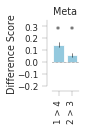

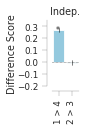

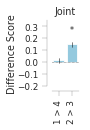

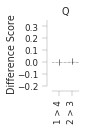

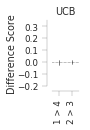

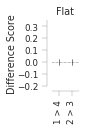

In [90]:
fig, _ = plot_contrasts_exp_3_goals_to_save('Meta', 'Meta')
fig.savefig('exp_3_goals_model_meta.png', dpi=300, bbox_inches='tight')
fig, _ = plot_contrasts_exp_3_goals_to_save('Independent', 'Indep.')
fig.savefig('exp_3_goals_model_indep.png', dpi=300, bbox_inches='tight')
fig, _ = plot_contrasts_exp_3_goals_to_save('Joint', 'Joint')
fig.savefig('exp_3_goals_model_joint.png', dpi=300, bbox_inches='tight')
fig, _ = plot_contrasts_exp_3_goals_to_save('Q-Learner', 'Q')
fig.savefig('exp_3_goals_model_q.png', dpi=300, bbox_inches='tight')
fig, _ = plot_contrasts_exp_3_goals_to_save('KalmanUCB', 'UCB')
fig.savefig('exp_3_goals_model_kal.png', dpi=300, bbox_inches='tight')
fig, _ = plot_contrasts_exp_3_goals_to_save('Flat', 'Flat')
fig.savefig('exp_3_goals_model_flat.png', dpi=300, bbox_inches='tight')




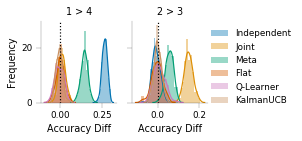

In [91]:
comp1 = stats_exp_3_goals.Comparison =='T1 vs T4'
comp2 = stats_exp_3_goals.Comparison =='T2 vs T3'
model = stats_exp_3_goals.Model
cc = sns.color_palette('colorblind')

with sns.plotting_context('paper', font_scale=1.0):
    _, axes = plt.subplots(1, 2, figsize=(3, 1.5), sharey=True)
    def plot_dist(m_name, ii):
            sns.distplot(stats_exp_3_goals.loc[(comp1) & (model == m_name), 'Mean'].values, label=m_name, color=cc[ii],
                        ax=axes[0])

    plot_dist('Independent', 0)
    plot_dist('Joint', 1)
    plot_dist('Meta', 2)
    plot_dist('Flat', 3)
    plot_dist('Q-Learner', 4)
    plot_dist('KalmanUCB', 5)

    def plot_dist(m_name, ii):
        sns.distplot(stats_exp_3_goals.loc[(comp2) & (model == m_name), 'Mean'].values, label=m_name, color=cc[ii],
                    ax=axes[1])

    plot_dist('Independent', 0)
    plot_dist('Joint', 1)
    plot_dist('Meta', 2)
    plot_dist('Flat', 3)
    plot_dist('Q-Learner', 4)
    plot_dist('KalmanUCB', 5)


    axes[0].set_ylabel('Frequency')
    axes[0].set_xlabel('Accuracy Diff')
    axes[0].set_title('1 > 4')

    axes[1].set_xlabel('Accuracy Diff')
    axes[1].set_title('2 > 3')
    sns.despine()
    
    for ax in axes:
        ax.spines['left'].set_lw(0.2)
        ax.spines['bottom'].set_lw(0.2)
        ax.tick_params(width=0.2)

    lgd = axes[1].legend(loc='upper right', bbox_to_anchor=(2.2, 1.00), framealpha=0)

    for ii in [0, 1]: axes[ii].axvline(x=0, ls=':', color='k') 

    plt.savefig('exp_3_goals_effect_size_all.png', dpi=300,bbox_extra_artists=(lgd,),
                bbox_inches='tight')




# Cross experiment comparions
for these, need to perform regression analysis on the behavioral data




In [92]:
import pymc3 as pm
from theano import tensor as T

## Experiment 1

In [93]:
uids = list(set(exp_2_goals_subj.subj))
X0 = exp_2_goals_subj[exp_2_goals_subj['In Goal'] & (exp_2_goals_subj['Times Seen Context'] <= 4) &
              (exp_2_goals_subj['Context'] >= 4)].copy()

X0['subj_id'] = [None] * len(X0)
for ii, uid in enumerate(uids):
    X0.loc[X0.subj == uid, 'sub_id'] = ii

n_subj = int(max(X0.sub_id) + 1)

y = np.array(X0['Accuracy'].values)
subj_idx = np.array(X0['sub_id'].values, dtype='int')

# predictors of interest
x_gA = np.array((X0.Context == 4) | (X0.Context == 5), dtype='int') - \
    np.array(X0.Context == 6, dtype='int')
x_tA = np.array(X0.Task == 'A', dtype='int') - np.array(X0.Task == 'B', dtype='int')
    
# nuissance
x_ti = X0['Times Seen Context'].values
x_ti -= x_ti.mean()
x_cr = X0['Context Repeated'].values

def tinvlogit(x):
    return T.exp(x) / (1 + T.exp(x))

with pm.Model() as glm_exp_2_goals:
        
    # Intercept for each subjects, distributed around group mean mu_a
    b_gA = pm.Normal('beta_goalA', mu=0., sd=100)
    b_tA = pm.Normal('beta_taskA', mu=0., sd=100)
    b_ti = pm.Normal('beta_times', mu=0., sd=100)
    b_cr = pm.Normal('beta_reps', mu=0., sd=100)
    
    # random effects modeled as constant addded/subtracted per subject
    mu_sub = pm.Normal('mu_subj', mu=0., sd=100)
    sigma_sub = pm.HalfCauchy('sigma_sub', beta=100)
    a_sub = pm.Normal('a_subj', mu=mu_sub, sd=sigma_sub, shape=n_subj)
    
    # Regression model
    y_hat = tinvlogit(b_gA * x_gA + b_tA * x_tA +
                      b_ti * x_ti + b_cr * x_cr + a_sub[subj_idx])
        
    #error term
    stdev = pm.HalfCauchy('eps', beta=100)
    
    # Data likelihood
    y_like = pm.Normal('like', mu=y_hat, sd=stdev, observed=y)
    
    
    # inference
    trace_exp_2_goals = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [eps, a_subj, sigma_sub, mu_subj, beta_reps, beta_times, beta_taskA, beta_goalA]
The number of effective samples is smaller than 25% for some parameters.


## Experiment 2

In [94]:
X0 = exp_4_goals_subj[~exp_4_goals_subj['Training'] & exp_4_goals_subj['In Goal']].copy()
uids = list(set(exp_4_goals_subj.subj))


X0['subj_id'] = [None] * len(X0)
for ii, uid in enumerate(uids):
    X0.loc[X0.subj == uid, 'sub_id'] = ii

n_subj = int(max(X0.sub_id) + 1)


y = np.array(X0['Accuracy'].values)
subj_idx = np.array(X0['sub_id'].values, dtype='int')
x_1 = np.array(X0.Context.values == 8, dtype=int) - \
     (X0.Context.values == 9 )
    
x_2 = np.array((X0.Context.values == 8) | (X0.Context.values == 9), dtype=int) - \
     ((X0.Context.values == 10) | (X0.Context.values == 11))
    
x_3 = np.array(X0.Context.values == 10, dtype=int) - \
     (X0.Context.values == 11)
    
x_ti = X0['Times Seen Context'].values
x_cr = X0['Context Repeated'].values

def tinvlogit(x):
    return T.exp(x) / (1 + T.exp(x))

with pm.Model() as glm_exp_4_goals:
        
    # Intercept for each subjects, distributed around group mean mu_a
    b_1 = pm.Normal('beta_ctxT1vs2',   mu=0., sd=100)
    b_2 = pm.Normal('beta_ctxT12vs34', mu=0., sd=100)
    b_3 = pm.Normal('beta_ctxT3vs4',   mu=0., sd=100)
    b_ti = pm.Normal('beta_times',     mu=0., sd=100)
    b_cr = pm.Normal('beta_reps',      mu=0., sd=100)
    
    # random effects modeled as constant addded/subtracted per subject
    mu_sub = pm.Normal('mu_subj', mu=0., sd=100)
    sigma_sub = pm.HalfCauchy('sigma_sub', beta=100)
    a_sub = pm.Normal('a_subj', mu=mu_sub, sd=sigma_sub, shape=n_subj)
    
    # Regression model
    y_hat = tinvlogit(b_1 * x_1 + b_2 * x_2 + b_3 * x_3 + \
                      b_ti * x_ti + b_cr * x_cr + a_sub[subj_idx])
        
    #error term
    stdev = pm.HalfCauchy('eps', beta=100)
    
    # Data likelihood
    y_like = pm.Normal('like', mu=y_hat, sd=stdev, observed=y)
    
    glm_trace_exp_4_goals = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [eps, a_subj, sigma_sub, mu_subj, beta_reps, beta_times, beta_ctxT3vs4, beta_ctxT12vs34, beta_ctxT1vs2]
The number of effective samples is smaller than 25% for some parameters.


In [95]:
# create meaningful regressors
# really on only want to look at training
X0 = exp_3_goals_subj[~exp_3_goals_subj['Training'] & exp_3_goals_subj['In Goal'] & 
               (exp_3_goals_subj['Times Seen Context'] <= 5)].copy()
uids = list(set(exp_3_goals_subj.subj))


X0['subj_id'] = [None] * len(X0)
for ii, uid in enumerate(uids):
    X0.loc[X0.subj == uid, 'sub_id'] = ii

n_subj = int(max(X0.sub_id) + 1)


y = np.array(X0['Accuracy'].values)
subj_idx = np.array(X0['sub_id'].values, dtype='int')
x_1 = np.array(X0.Context.values == 6, dtype='int') - \
     (X0.Context.values == 9)
    
x_2 = np.array(X0.Context.values == 7, dtype='int') - \
     (X0.Context.values == 8) 
    
x_3 = np.array((X0.Context.values == 6) | (X0.Context.values == 9), dtype='int') - \
     ((X0.Context.values == 7) | (X0.Context.values == 8))
    
x_ti = X0['Times Seen Context'].values
x_cr = X0['Context Repeated'].values

def tinvlogit(x):
    return T.exp(x) / (1 + T.exp(x))

with pm.Model() as glm_exp_3_goals:
        
    # Intercept for each subjects, distributed around group mean mu_a
    b_1 = pm.Normal('beta_ctxT1vs4', mu=0., sd=100)
    b_2 = pm.Normal('beta_ctxT2vs3', mu=0., sd=100)
    b_3 = pm.Normal('beta_ctxT1/4vs2/3',  mu=0., sd=100)
    b_ti = pm.Normal('beta_times',    mu=0., sd=100)
    b_cr = pm.Normal('beta_reps',     mu=0., sd=100)
    
    # random effects modeled as constant addded/subtracted per subject
    mu_sub = pm.Normal('mu_subj', mu=0., sd=100)
    sigma_sub = pm.HalfCauchy('sigma_sub', beta=100)
    a_sub = pm.Normal('a_subj', mu=mu_sub, sd=sigma_sub, shape=n_subj)
    
    # Regression model
    y_hat = tinvlogit(b_1 * x_1 + b_2 * x_2 + b_3 * x_3 + \
                      b_ti * x_ti + b_cr * x_cr + a_sub[subj_idx])
        
    #error term
    stdev = pm.HalfCauchy('eps', beta=100)
    
    # Data likelihood
    y_like = pm.Normal('like', mu=y_hat, sd=stdev, observed=y)
    
    trace_exp_3_goals = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [eps, a_subj, sigma_sub, mu_subj, beta_reps, beta_times, beta_ctxT1/4vs2/3, beta_ctxT2vs3, beta_ctxT1vs4]


In [96]:
pm.summary(trace_exp_2_goals).loc[['beta_goalA', 'beta_taskA'], 'mean']

beta_goalA    0.007797
beta_taskA   -0.408611
Name: mean, dtype: float64

In [97]:
# comp_a = hdi_data_exp_4_goals.Comparison == 'T1 vs T2'
# comp_b = hdi_data_exp_4_goals.Comparison == 'T3 vs T4'

# hdi_data_exp_4_goals.loc[(comp_a | comp_b) &( model == 'Meta'), :]

# stats_exp_2_goals.loc[(goalA) & (model == m_name), 'Acc'].values - \
#                      stats_exp_2_goals.loc[(~goalA) & (model == m_name), 'Acc'].values
def main_effect_task_mean_sd(model):
    v0 = stats_exp_2_goals.loc[
                (stats_exp_2_goals.Model == model) & 
                (stats_exp_2_goals.Task == 'A') ,'Acc'].values
    v1 = stats_exp_2_goals.loc[
                (stats_exp_2_goals.Model == model) & 
                (stats_exp_2_goals.Task == 'B') ,'Acc'].values
    diff = -v0 + v1
    diff.sort()    
    return np.mean(diff), np.std(diff)

def main_effect_goal_mean_sd(model):
    v0 = stats_exp_2_goals.loc[
                (stats_exp_2_goals.Model == model) & 
                (stats_exp_2_goals['Correct Goal'] == 'A') ,'Acc'].values
    v1 = stats_exp_2_goals.loc[
                (stats_exp_2_goals.Model == model) & 
                (stats_exp_2_goals['Correct Goal'] == 'B') ,'Acc'].values
    diff = v0 - v1
    diff.sort()
    
    return np.mean(diff), np.std(diff)


set(stats_exp_2_goals.Model
)# main_effect_goal_mean_sd('Meta')
# -main_effect_task_mean_sd('Meta')[0]

{'Flat',
 'Independent',
 'Joint',
 'KalmanUCB',
 'Meta',
 'NoCTX_Q-Learner',
 'Q-Learner'}

In [98]:
df = []

meta = [main_effect_goal_mean_sd('Meta')[0], main_effect_task_mean_sd('Meta')[0]]
joint = [main_effect_goal_mean_sd('Meta')[0], main_effect_task_mean_sd('Joint')[0]]
indep = [main_effect_goal_mean_sd('Meta')[0], main_effect_task_mean_sd('Independent')[0]]
subjs = [pm.summary(trace_exp_2_goals).loc[['beta_goalA',], 'mean'].values[0],
        -pm.summary(trace_exp_2_goals).loc[['beta_taskA',], 'mean'].values[0]]


meta /= np.linalg.norm(meta)
joint /= np.linalg.norm(joint)
indep /= np.linalg.norm(indep)
subjs /= np.linalg.norm(subjs)


df.append(pd.DataFrame({
    'Experiment': [1] * 3,
    'angle cos': [np.dot(subjs, joint), np.dot(subjs, indep), np.dot(meta, subjs)],
    'Model': ['Joint', 'Indep.', 'Meta'],
    'NMI': [1.0] * 3
}))

comp_a = hdi_data_exp_4_goals.Comparison == 'T1 vs T2'
comp_b = hdi_data_exp_4_goals.Comparison == 'T3 vs T4'
model = hdi_data_exp_4_goals.Model
meta = hdi_data_exp_4_goals.loc[(comp_a | comp_b) &( model == 'Meta'), 'Mean'].values
joint = hdi_data_exp_4_goals.loc[(comp_a | comp_b) &( model == 'Joint'), 'Mean'].values
indep = hdi_data_exp_4_goals.loc[(comp_a | comp_b) &( model == 'Independent'), 'Mean'].values
subjs = pm.summary(glm_trace_exp_4_goals).loc[['beta_ctxT1vs2', 'beta_ctxT3vs4'], 'mean'].values

meta /= np.linalg.norm(meta)
joint /= np.linalg.norm(joint)
indep /= np.linalg.norm(indep)
subjs /= np.linalg.norm(subjs)

# print np.dot(subjs, flat), np.dot(subjs, joint), np.dot(subjs, indep), np.dot(meta, subjs)
df.append(pd.DataFrame({
    'Experiment': [2] * 3, 
    'angle cos': [np.dot(subjs, joint), np.dot(subjs, indep), np.dot(meta, subjs)],
    'Model': [ 'Joint', 'Indep.', 'Meta'],
    'NMI': [0.126] * 3
}))


comp_a = hdi_data_exp_3_goals.Comparison == 'T1 vs T4'
comp_b = hdi_data_exp_3_goals.Comparison == 'T2 vs T3'
model = hdi_data_exp_3_goals.Model
meta = hdi_data_exp_3_goals.loc[(comp_a | comp_b) &( model == 'Meta'), 'Mean'].values
joint = hdi_data_exp_3_goals.loc[(comp_a | comp_b) &( model == 'Joint'), 'Mean'].values
indep = hdi_data_exp_3_goals.loc[(comp_a | comp_b) &( model == 'Independent'), 'Mean'].values
flat = hdi_data_exp_3_goals.loc[(comp_a | comp_b) &( model == 'Flat'), 'Mean'].values


subjs = pm.summary(trace_exp_3_goals).loc[['beta_ctxT1vs4', 'beta_ctxT2vs3'], 'mean'].values

meta /= np.linalg.norm(meta)
joint /= np.linalg.norm(joint)
indep /= np.linalg.norm(indep)
subjs /= np.linalg.norm(subjs)

df.append(pd.DataFrame({
    'Experiment': [3] * 3,
    'angle cos': [np.dot(subjs, joint), np.dot(subjs, indep), np.dot(meta, subjs)],
    'Model': ['Joint', 'Indep.', 'Meta'],
    'NMI': [0.22] * 3
}))
# the is the nmi for experiments 1, 2 and 3 respectivley


df = pd.concat(df)
df.sort_values('NMI', inplace=True)

# nmi = [1.0, 0.126, 0.22]
# plt.scatter(x=[0.22] * 4, y = [np.dot(subjs, flat), np.dot(subjs, joint), np.dot(subjs, indep), np.dot(meta, subjs)])
# plt.scatter(x=[0.22] * 4, y = [np.dot(subjs, flat), np.dot(subjs, joint), np.dot(subjs, indep), np.dot(meta, subjs)])


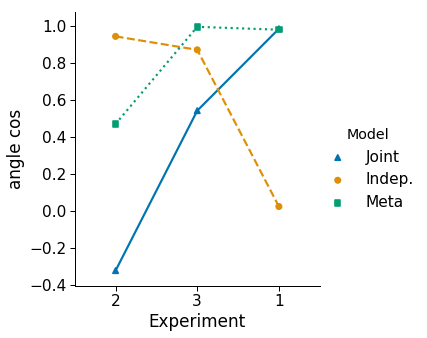

In [99]:
sns.catplot(data=df, x='Experiment', y='angle cos', hue='Model', kind='point', order = [2, 3, 1],
           markers=["^", "o", 's'], linestyles=["-", "--", ":"], palette='colorblind')


In [126]:

df = []

for ii in range(200):
    
    # experiment 1
    
    w_joint, w_indep = [], []
    for w, m in zip([w_joint, w_indep],['Joint', 'Independent']):
        v0 = stats_exp_2_goals.loc[
                    (stats_exp_2_goals.Model == m) & 
                    (stats_exp_2_goals['Correct Goal'] == 'A') &
                    (stats_exp_2_goals.Sample == ii)
            ,'Acc'].mean()
        v1 = stats_exp_2_goals.loc[
                    (stats_exp_2_goals.Model == m) & 
                    (stats_exp_2_goals['Correct Goal'] == 'B') &
                    (stats_exp_2_goals.Sample == ii)
            ,'Acc'].mean()
        w.append(v0 - v1)

        v0 = stats_exp_2_goals.loc[
                    (stats_exp_2_goals.Model == m) & 
                    (stats_exp_2_goals.Task == 'A') &
                    (stats_exp_2_goals.Sample == ii)
            ,'Acc'].mean()
        v1 = stats_exp_2_goals.loc[
                    (stats_exp_2_goals.Model == m) & 
                    (stats_exp_2_goals.Task == 'B').values  &
                    (stats_exp_2_goals.Sample == ii)
            ,'Acc'].mean()
        w.append(-v0 + v1)
        
        
    #draw a sample from the posterior of the subjects distribution
    idx = np.random.randint(len(trace_exp_2_goals))
    w_subj = [trace_exp_2_goals['beta_goalA'][idx], -trace_exp_2_goals['beta_taskA'][idx]]
    
#     w_joint = np.array(w_joint) / np.linalg.norm(w_joint)
#     w_indep = np.array(w_indep) / np.linalg.norm(w_indep)
#     w_subj = np.array(w_subj) / np.linalg.norm(w_subj)

    df.append(pd.DataFrame({
        'Experiment': ["Joint"] * 2,
        'dot product': [np.dot(w_joint, w_subj), np.dot(w_indep, w_subj)],
        'angle cos': [np.dot(w_joint, w_subj) / (np.linalg.norm(w_joint) * np.linalg.norm(w_subj)),
              np.dot(w_indep, w_subj) / (np.linalg.norm(w_indep) * np.linalg.norm(w_subj))],
        'Model': ['Joint', 'Indep.',],
        'NMI': [1.0] * 2,
        'Sample': [ii] * 2,
    }))
    
    # experiment 2
    w_joint, w_indep = [], []
    for w, m in zip([w_joint, w_indep],['Joint', 'Independent']):
        v0 = stats_exp_4_goals.loc[
                    (stats_exp_4_goals.Model == m) & 
                    (stats_exp_4_goals.Comparison == 'T1 vs T2') &
                    (stats_exp_4_goals.Sample == ii)
            ,'Mean'].mean()
        w.append(v0)

        v0 = stats_exp_4_goals.loc[
                    (stats_exp_4_goals.Model == m) & 
                    (stats_exp_4_goals.Comparison == 'T3 vs T4') &
                    (stats_exp_4_goals.Sample == ii)
            ,'Mean'].mean()
        w.append(v0)
        
    #draw a sample from the posterior of the subjects distribution
    idx = np.random.randint(len(glm_trace_exp_4_goals))
    w_subj = [glm_trace_exp_4_goals['beta_ctxT1vs2'][idx], glm_trace_exp_4_goals['beta_ctxT3vs4'][idx]]
    


    df.append(pd.DataFrame({
        'Experiment': ['Indep.'] * 2,
        'dot product': [np.dot(w_joint, w_subj), np.dot(w_indep, w_subj)],
        'angle cos': [np.dot(w_joint, w_subj) / (np.linalg.norm(w_joint) * np.linalg.norm(w_subj)),
                      np.dot(w_indep, w_subj) / (np.linalg.norm(w_indep) * np.linalg.norm(w_subj))],
        'Model': ['Joint', 'Indep.',],
        'NMI': [0.126] * 2,
        'Sample': [ii] * 2,
    }))
    
    # experiment 3
    w_joint, w_indep = [], []
    for w, m in zip([w_joint, w_indep],['Joint', 'Independent']):
        v0 = stats_exp_3_goals.loc[
                    (stats_exp_3_goals.Model == m) & 
                    (stats_exp_3_goals.Comparison == 'T1 vs T4') &
                    (stats_exp_3_goals.Sample == ii)
            ,'Mean'].mean()
        w.append(v0)

        v0 = stats_exp_3_goals.loc[
                    (stats_exp_3_goals.Model == m) & 
                    (stats_exp_3_goals.Comparison == 'T2 vs T3') &
                    (stats_exp_3_goals.Sample == ii)
            ,'Mean'].mean()
        w.append(v0)
        
    #draw a sample from the posterior of the subjects distribution
    idx = np.random.randint(len(trace_exp_3_goals))
    w_subj = [trace_exp_3_goals['beta_ctxT1vs4'][idx], trace_exp_3_goals['beta_ctxT2vs3'][idx]]
    


    df.append(pd.DataFrame({
        'Experiment': ['Ambiguous'] * 2,
        'dot product': [np.dot(w_joint, w_subj), np.dot(w_indep, w_subj)],
        'angle cos': [np.dot(w_joint, w_subj) / (np.linalg.norm(w_joint) * np.linalg.norm(w_subj)),
                      np.dot(w_indep, w_subj) / (np.linalg.norm(w_indep) * np.linalg.norm(w_subj))],
        'Model': ['Joint', 'Indep.',],
        'NMI': [0.22] * 2,
        'Sample': [ii] * 2,
    }))
df = pd.concat(df)
angle_cos_df = df.copy()



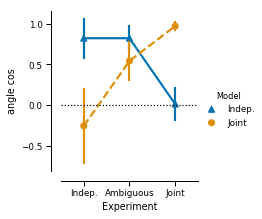

In [128]:
with sns.plotting_context('paper'):
    sns.catplot(data=df, x='Experiment', y='angle cos', hue='Model', kind='point', 
                order = ['Indep.', "Ambiguous", "Joint"], hue_order=['Indep.', "Joint"],
               markers=["^", "o", 's'], linestyles=["-", "--", ":"], palette='colorblind', ci='sd', height=3.)
    plt.axhline(y=0, ls=':', c='k')
#     plt.ylabel('contrast similarity')
    sns.despine(offset=10)
    plt.savefig('ModelComp.tif', dpi=300, bbox_inches='tight')

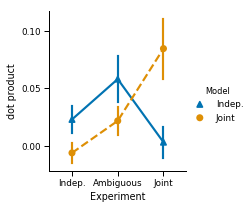

In [102]:
# sns.catplot(data=pd.concat(df), y='angle cos', hue='Model', x='Experiment')
with sns.plotting_context('paper'):
    sns.catplot(data=df, x='Experiment', y='dot product', hue='Model', kind='point', 
                order = ['Indep.', "Ambiguous", "Joint"], hue_order=['Indep.', "Joint"],
               markers=["^", "o", 's'], linestyles=["-", "--", ":"], palette='colorblind', ci='sd', height=3.)
#     plt.savefig('ModelComp.png', dpi=300, bbox_inches='tight')



In [103]:
df['scaled dot product'] = df['dot product'] / np.max(np.abs(df['dot product']))

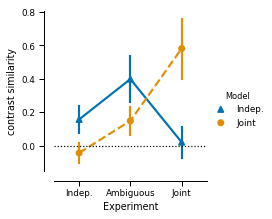

In [104]:
# sns.catplot(data=pd.concat(df), y='angle cos', hue='Model', x='Experiment')
with sns.plotting_context('paper'):
    
    sns.catplot(data=df, x='Experiment', y='scaled dot product', hue='Model', kind='point', 
                order = ['Indep.', "Ambiguous", "Joint"], hue_order=['Indep.', "Joint"],
               markers=["^", "o", 's'], linestyles=["-", "--", ":"], palette='colorblind', ci='sd', height=3.)
#     plt.savefig('ModelComp.png', dpi=300, bbox_inches='tight')


    plt.axhline(y=0, ls=':', c='k')
    plt.ylabel('contrast similarity')
    sns.despine(offset=10)

In [105]:
df = []

meta = [main_effect_goal_mean_sd('Meta')[0], main_effect_task_mean_sd('Meta')[0]]
joint = [main_effect_goal_mean_sd('Meta')[0], main_effect_task_mean_sd('Joint')[0]]
indep = [main_effect_goal_mean_sd('Meta')[0], main_effect_task_mean_sd('Independent')[0]]
subjs = [pm.summary(trace_exp_2_goals).loc[['beta_goalA',], 'mean'].values[0],
        -pm.summary(trace_exp_2_goals).loc[['beta_taskA',], 'mean'].values[0]]


meta /= np.linalg.norm(meta)
joint /= np.linalg.norm(joint)
indep /= np.linalg.norm(indep)
subjs /= np.linalg.norm(subjs)


df.append(pd.DataFrame({
    'Experiment': [1] * 3,
    'angle cos': [np.dot(subjs, joint), np.dot(subjs, indep), np.dot(meta, subjs)],
    'Model': ['Joint', 'Indep.', 'Meta'],
    'NMI': [1.0] * 3
}))

comp_a = hdi_data_exp_4_goals.Comparison == 'T1 vs T2'
comp_b = hdi_data_exp_4_goals.Comparison == 'T3 vs T4'
model = hdi_data_exp_4_goals.Model
meta = hdi_data_exp_4_goals.loc[(comp_a | comp_b) &( model == 'Meta'), 'Mean'].values
joint = hdi_data_exp_4_goals.loc[(comp_a | comp_b) &( model == 'Joint'), 'Mean'].values
indep = hdi_data_exp_4_goals.loc[(comp_a | comp_b) &( model == 'Independent'), 'Mean'].values
subjs = pm.summary(glm_trace_exp_4_goals).loc[['beta_ctxT1vs2', 'beta_ctxT3vs4'], 'mean'].values

meta /= np.linalg.norm(meta)
joint /= np.linalg.norm(joint)
indep /= np.linalg.norm(indep)
subjs /= np.linalg.norm(subjs)

# print np.dot(subjs, flat), np.dot(subjs, joint), np.dot(subjs, indep), np.dot(meta, subjs)
df.append(pd.DataFrame({
    'Experiment': [2] * 3, 
    'angle cos': [np.dot(subjs, joint), np.dot(subjs, indep), np.dot(meta, subjs)],
    'Model': [ 'Joint', 'Indep.', 'Meta'],
    'NMI': [0.126] * 3
}))


comp_a = hdi_data_exp_3_goals.Comparison == 'T1 vs T4'
comp_b = hdi_data_exp_3_goals.Comparison == 'T2 vs T3'
model = hdi_data_exp_3_goals.Model
meta = hdi_data_exp_3_goals.loc[(comp_a | comp_b) &( model == 'Meta'), 'Mean'].values
joint = hdi_data_exp_3_goals.loc[(comp_a | comp_b) &( model == 'Joint'), 'Mean'].values
indep = hdi_data_exp_3_goals.loc[(comp_a | comp_b) &( model == 'Independent'), 'Mean'].values
flat = hdi_data_exp_3_goals.loc[(comp_a | comp_b) &( model == 'Flat'), 'Mean'].values


subjs = pm.summary(trace_exp_3_goals).loc[['beta_ctxT1vs4', 'beta_ctxT2vs3'], 'mean'].values

meta /= np.linalg.norm(meta)
joint /= np.linalg.norm(joint)
indep /= np.linalg.norm(indep)
subjs /= np.linalg.norm(subjs)

df.append(pd.DataFrame({
    'Experiment': [3] * 3,
    'angle cos': [np.dot(subjs, joint), np.dot(subjs, indep), np.dot(meta, subjs)],
    'Model': ['Joint', 'Indep.', 'Meta'],
    'NMI': [0.22] * 3
}))
# the is the nmi for experiments 1, 2 and 3 respectivley


df = pd.concat(df)
df.sort_values('NMI', inplace=True)

# nmi = [1.0, 0.126, 0.22]
# plt.scatter(x=[0.22] * 4, y = [np.dot(subjs, flat), np.dot(subjs, joint), np.dot(subjs, indep), np.dot(meta, subjs)])
# plt.scatter(x=[0.22] * 4, y = [np.dot(subjs, flat), np.dot(subjs, joint), np.dot(subjs, indep), np.dot(meta, subjs)])



In [106]:
df

,Experiment,Model,NMI,angle cos
0,2,Joint,0.126,-0.321651
1,2,Indep.,0.126,0.941366
2,2,Meta,0.126,0.469197
0,3,Joint,0.220,0.540858
1,3,Indep.,0.220,0.868953
2,3,Meta,0.220,0.992941
0,1,Joint,1.000,0.982443
1,1,Indep.,1.000,0.024008
2,1,Meta,1.000,0.977383


In [107]:
# sns.relplot(data=df, x='model vs meta', y='model vs subj', hue='Model')

# Meta-Agent Comparison

In [108]:
meta_agent_prob = []
for ii in tnrange(200):
    sample_exp_4_goals = draw_batch(sims_exp_4, batch_size=114)
    sample_exp_2_goals = draw_exp_2_sample()
    sample_exp_3_goals = draw_batch(sims_exp_3, batch_size=115)


    meta_2goals = sample_exp_2_goals[(sample_exp_2_goals['Model'] == 'Meta') & sample_exp_2_goals['In Goal']]
    meta_3goals = sample_exp_3_goals[(sample_exp_3_goals['Model'] == 'Meta') & sample_exp_3_goals['In Goal']]
    meta_4goals = sample_exp_4_goals[(sample_exp_4_goals['Model'] == 'Meta') & sample_exp_4_goals['In Goal']]
    
    meta_agent_prob.append({
    'Sample': ii,
    'Exp 1': meta_2goals.loc[meta_2goals['Trial Number'] == 18, 'Joint Probability'].mean(),
    'Exp 2': meta_4goals.loc[meta_4goals['Trial Number'] == 160, 'Joint Probability'].mean(),
    'Exp 3': meta_3goals.loc[meta_3goals['Trial Number'] == 120, 'Joint Probability'].mean(),
    })

/Users/nicholasfranklin/anaconda3/envs/comp_gen/lib/python2.7/site-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  


In [109]:
meta_agent_prob = pd.DataFrame(meta_agent_prob)

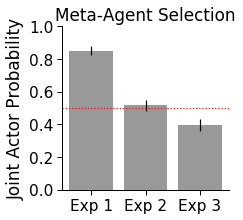

In [110]:
y = meta_agent_prob.mean().loc[['Exp 1', 'Exp 2', 'Exp 3']]
y_err = meta_agent_prob.std().loc[['Exp 1', 'Exp 2', 'Exp 3']]
fig, ax = plt.subplots(figsize=(3, 3))
plt.bar(range(3), y, color='k', alpha=0.4)
ax.set_xticks(range(3))
ax.set_xticklabels(['Exp 1', 'Exp 2', 'Exp 3'])
sns.despine()

plt.errorbar(range(3), y, y_err, ls='', c='k')

# # lb, ub = get_hdi(meta_agent_prob['Exp 1'])
# plt.plot([0, 0], [lb, ub], 'k')

# # lb, ub = get_hdi(meta_agent_prob['Exp 2'])
# plt.plot([1, 1], [lb, ub], 'k')

# # lb, ub = get_hdi(meta_agent_prob['Exp 3'])
# plt.plot([2, 2], [lb, ub], 'k')

ax.axhline(y=0.5, ls=':', color='r')
ax.set_ylim([0, 1])
ax.set_ylabel('Joint Actor Probability')
sns.despine()
plt.title('Meta-Agent Selection')
plt.savefig('Meta_agents_prob_training_end.png', dpi=300, bbox_inches='tight')

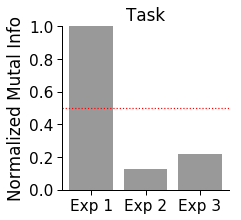

In [111]:
fig, ax = plt.subplots(figsize=(3, 3))
plt.sca(ax)
nmi = [1.0, 0.126, 0.22]
plt.bar(range(3), nmi, color='k', alpha=0.4)
ax.set_xticks(range(3))
ax.set_xticklabels(['Exp 1', 'Exp 2', 'Exp 3'])
ax.set_ylabel('Normalized Mutal Info')
ax.axhline(y=0.5, ls=':', color='r')
ax.set_ylim([0, 1])
plt.title('Task')
sns.despine()
plt.savefig('Training_NMI.png', dpi=300, bbox_inches='tight')


Text(0.5,1,'Task')

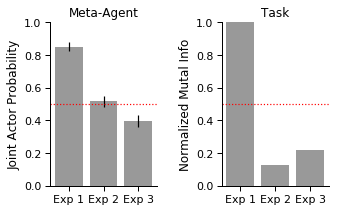

In [112]:
# repeat, but with NMI included
sns.set_context('paper', font_scale=1.25)
y = meta_agent_prob.mean().loc[['Exp 1', 'Exp 2', 'Exp 3']]
y_err = meta_agent_prob.std().loc[['Exp 1', 'Exp 2', 'Exp 3']]

fig, axes = plt.subplots(1, 2, figsize=(5, 3), gridspec_kw=dict(wspace=0.6))
ax = axes[0]
plt.sca(ax)
plt.bar(range(3), y, color='k', alpha=0.4)
ax.set_xticks(range(3))
ax.set_xticklabels(['Exp 1', 'Exp 2', 'Exp 3'])
sns.despine()

ax.errorbar(range(3), y, y_err, ls='', c='k')


# lb, ub = get_hdi(meta_agent_prob['Exp 1'])
# plt.plot([0, 0], [lb, ub], 'k')

# lb, ub = get_hdi(meta_agent_prob['Exp 2'])
# plt.plot([1, 1], [lb, ub], 'k')

# lb, ub = get_hdi(meta_agent_prob['Exp 3'])
# plt.plot([2, 2], [lb, ub], 'k')

ax.axhline(y=0.5, ls=':', color='r')
ax.set_ylim([0, 1])
ax.set_ylabel('Joint Actor Probability')
sns.despine()
plt.title('Meta-Agent')

ax = axes[1]
plt.sca(ax)
nmi = [1.0, 0.126, 0.22]
plt.bar(range(3), nmi, color='k', alpha=0.4)
ax.set_xticks(range(3))
ax.set_xticklabels(['Exp 1', 'Exp 2', 'Exp 3'])
ax.set_ylabel('Normalized Mutal Info')
ax.axhline(y=0.5, ls=':', color='r')
ax.set_ylim([0, 1])
plt.title('Task')


# plt.savefig('Meta_agents_prob_training_end_NMI.png', dpi=300, bbox_inches='tight')

one figure with the model comparison's and the meta-agent probability

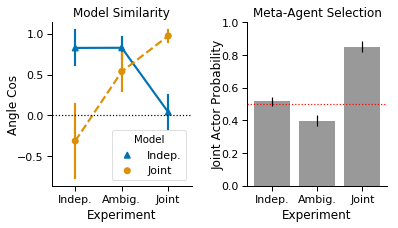

In [123]:
# repeat, but w/o NMI + including the model comparisons
sns.set_context('paper', font_scale=1.25)

# order the experiments by inclreaseing NMI
y = meta_agent_prob.mean().loc[['Exp 2',   'Exp 3', 'Exp 1',]]
fig, axes = plt.subplots(1, 2, figsize=(6, 3), gridspec_kw=dict(wspace=0.4))
ax = axes[1]
plt.sca(ax)
plt.bar(range(3), y, color='k', alpha=0.4)
ax.set_xticks(range(3))
ax.set_xticklabels(['Indep.', "Ambig.", "Joint"])
sns.despine()


# lb, ub = get_hdi(meta_agent_prob['Exp 2'])
# plt.plot([0, 0], [lb, ub], 'k')

# lb, ub = get_hdi(meta_agent_prob['Exp 3'])
# plt.plot([1, 1], [lb, ub], 'k')

# lb, ub = get_hdi(meta_agent_prob['Exp 1'])
# plt.plot([2, 2], [lb, ub], 'k')
ax.errorbar(range(3), y, y_err, ls='', c='k')





ax.axhline(y=0.5, ls=':', color='r')
ax.set_ylim([0, 1])
ax.set_ylabel('Joint Actor Probability', labelpad=-3)
ax.set_xlabel('Experiment')
sns.despine()
plt.title('Meta-Agent Selection')

ax = axes[0]
sns.pointplot(data=angle_cos_df, x='Experiment', y='angle cos', hue='Model', ax=ax, 
            order = ['Indep.', "Ambiguous", "Joint"], hue_order=['Indep.', "Joint"],
           markers=["^", "o", 's'], linestyles=["-", "--", ":"], palette='colorblind', ci='sd', height=3.)
ax.set_ylabel('Angle Cos', labelpad=-3)
ax.axhline(y=0, ls=':', c='k')
ax.set_xticklabels(['Indep.', "Ambig.", "Joint"])
ax.set_title('Model Similarity')

sns.despine()

# #     plt.ylabel('contrast similarity')
#     sns.despine(offset=10)

# ax = axes[1]
# plt.sca(ax)
# nmi = [1.0, 0.126, 0.22]
# plt.bar(range(3), nmi, color='k', alpha=0.4)
# ax.set_xticks(range(3))
# ax.set_xticklabels(['Exp 1', 'Exp 2', 'Exp 3'])
# ax.set_ylabel('Normalized Mutal Info')
# ax.axhline(y=0.5, ls=':', color='r')
# ax.set_ylim([0, 1])
# plt.title('Task')


plt.savefig('Meta_agents_prob_training_end_model_similarity.png', dpi=300, bbox_inches='tight')

In [114]:
df

,Experiment,Model,NMI,angle cos
0,2,Joint,0.126,-0.321651
1,2,Indep.,0.126,0.941366
2,2,Meta,0.126,0.469197
0,3,Joint,0.220,0.540858
1,3,Indep.,0.220,0.868953
2,3,Meta,0.220,0.992941
0,1,Joint,1.000,0.982443
1,1,Indep.,1.000,0.024008
2,1,Meta,1.000,0.977383


In [115]:
help(sns.despine)

Help on function despine in module seaborn.utils:

despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)
    Remove the top and right spines from plot(s).
    
    fig : matplotlib figure, optional
        Figure to despine all axes of, default uses current figure.
    ax : matplotlib axes, optional
        Specific axes object to despine.
    top, right, left, bottom : boolean, optional
        If True, remove that spine.
    offset : int or dict, optional
        Absolute distance, in points, spines should be moved away
        from the axes (negative values move spines inward). A single value
        applies to all spines; a dict can be used to set offset values per
        side.
    trim : bool, optional
        If True, limit spines to the smallest and largest major tick
        on each non-despined axis.
    
    Returns
    -------
    None



## Training Accuracy
Bootstrap statistics for training accuracy across experiments

In [116]:
train_acc_2_g = sims_exp_2.loc[sims_exp_2['In Goal'] & (sims_exp_2['Context'] < 3), :].groupby(
    ['Model', 'Iteration']).mean()['Acc']
train_acc_3_g = sims_exp_3.loc[sims_exp_3['In Goal'] & (sims_exp_3['Context'] < 7), :].groupby(
    ['Model', 'Iteration']).mean()['Acc']
train_acc_4_g = sims_exp_4.loc[sims_exp_4['In Goal'] & (sims_exp_4['Context'] < 9), :].groupby(
    ['Model', 'Iteration']).mean()['Acc']



In [117]:
def draw_bootstrap_sample_acc_2g(model):
    idx = np.random.permutation(range(2000))[:49 + 80]
    return np.mean(train_acc_2_g.loc[model, idx].values)

def draw_bootstrap_sample_acc_3g(model):
    idx = np.random.permutation(range(1000))[:114]
    return np.mean(train_acc_3_g.loc[model, idx].values)

def draw_bootstrap_sample_acc_4g(model):
    idx = np.random.permutation(range(1000))[:115]
    return np.mean(train_acc_4_g.loc[model, idx].values)

In [118]:
training_acc = []
for ii in range(100):
    for m in [u'Flat', u'Independent', u'Joint', u'Meta']:
        training_acc.append({
            'Model': m,
            'Experiment': 'Exp 1',
            'Accuracy': draw_bootstrap_sample_acc_2g(m),
            'Iteration': ii,
        })
        training_acc.append({
            'Model': m,
            'Experiment': 'Exp 2',
            'Accuracy': draw_bootstrap_sample_acc_4g(m),
            'Iteration': ii,
        })
        training_acc.append({
            'Model': m,
            'Experiment': 'Exp 3',
            'Accuracy': draw_bootstrap_sample_acc_3g(m),
            'Iteration': ii,
        })
training_acc = pd.DataFrame(training_acc) 

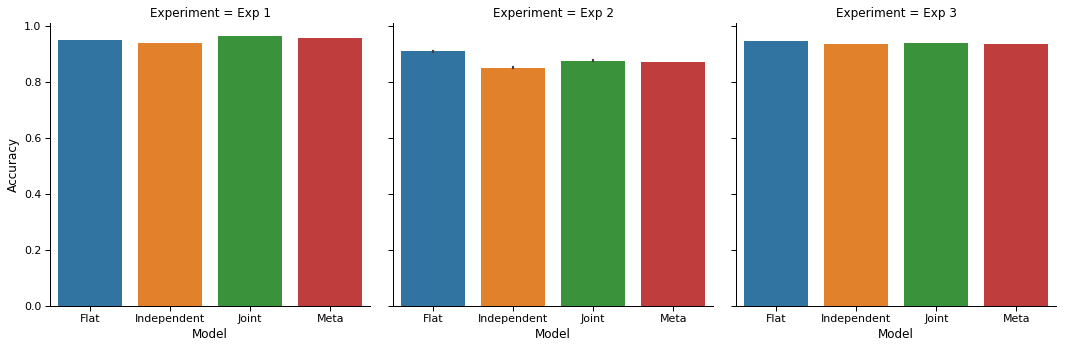

In [119]:
sns.catplot(data=training_acc, y='Accuracy', x='Model', col='Experiment', kind='bar',)

Indep Mean=-0.0119379844961, 95% HDI = [-0.0184108527132, -0.00411821705426]
Joint Mean=0.0128754844961, 95% HDI = [0.00557170542636, 0.0218023255814]
Meta  Mean=0.00738856589147, 95% HDI = [0.00169573643411, 0.0135658914729]


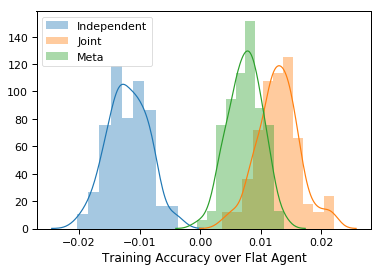

In [120]:
# Experiment 1
sns.distplot(training_acc.loc[(training_acc.Experiment == 'Exp 1') & (training_acc.Model == 'Independent'), 'Accuracy'].values - \
training_acc.loc[(training_acc.Experiment == 'Exp 1') & (training_acc.Model == 'Flat'), 'Accuracy'].values, label='Independent')

sns.distplot(training_acc.loc[(training_acc.Experiment == 'Exp 1') & (training_acc.Model == 'Joint'), 'Accuracy'].values - \
training_acc.loc[(training_acc.Experiment == 'Exp 1') & (training_acc.Model == 'Flat'), 'Accuracy'].values, label='Joint')

sns.distplot(training_acc.loc[(training_acc.Experiment == 'Exp 1') & (training_acc.Model == 'Meta'), 'Accuracy'].values - \
training_acc.loc[(training_acc.Experiment == 'Exp 1') & (training_acc.Model == 'Flat'), 'Accuracy'].values, label='Meta')
plt.legend()
plt.xlabel("Training Accuracy over Flat Agent")

d_i = training_acc.loc[(training_acc.Experiment == 'Exp 1') & (training_acc.Model == 'Independent'), 'Accuracy'].values - \
training_acc.loc[(training_acc.Experiment == 'Exp 1') & (training_acc.Model == 'Flat'), 'Accuracy'].values
d_j = training_acc.loc[(training_acc.Experiment == 'Exp 1') & (training_acc.Model == 'Joint'), 'Accuracy'].values - \
training_acc.loc[(training_acc.Experiment == 'Exp 1') & (training_acc.Model == 'Flat'), 'Accuracy'].values
d_m = training_acc.loc[(training_acc.Experiment == 'Exp 1') & (training_acc.Model == 'Meta'), 'Accuracy'].values -\
training_acc.loc[(training_acc.Experiment == 'Exp 1') & (training_acc.Model == 'Flat'), 'Accuracy'].values
# print p_i, p_j, p_m
d_i.sort()
d_j.sort()
d_m.sort()

n = len(d_i)
print "Indep Mean={}, 95% HDI = [{}, {}]".format(d_i.mean(), d_i[int(np.floor(n * 0.025))], d_i[int(np.ceil(n * 0.975))]) 
print "Joint Mean={}, 95% HDI = [{}, {}]".format(d_j.mean(),d_j[int(np.floor(n * 0.025))], d_j[int(np.ceil(n * 0.975))]) 
print "Meta  Mean={}, 95% HDI = [{}, {}]".format(d_m.mean(),d_m[int(np.floor(n * 0.025))], d_m[int(np.ceil(n * 0.975))])


Indep Mean=-0.0584115267947, 95% HDI = [-0.0798786653185, -0.0370070778564]
Joint Mean=-0.0328265925177, 95% HDI = [-0.0462588473205, -0.0227502527806]
Meta  Mean=-0.0375505561173, 95% HDI = [-0.0479777553084, -0.0248230535895]


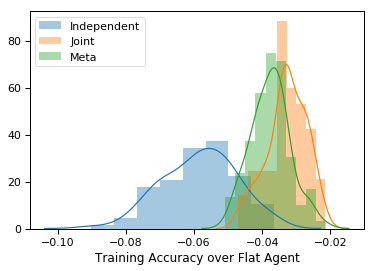

In [121]:
# Experiment 2
sns.distplot(training_acc.loc[(training_acc.Experiment == 'Exp 2') & (training_acc.Model == 'Independent'), 'Accuracy'].values - \
training_acc.loc[(training_acc.Experiment == 'Exp 2') & (training_acc.Model == 'Flat'), 'Accuracy'].values, label='Independent')

sns.distplot(training_acc.loc[(training_acc.Experiment == 'Exp 2') & (training_acc.Model == 'Joint'), 'Accuracy'].values - \
training_acc.loc[(training_acc.Experiment == 'Exp 2') & (training_acc.Model == 'Flat'), 'Accuracy'].values, label='Joint')

sns.distplot(training_acc.loc[(training_acc.Experiment == 'Exp 2') & (training_acc.Model == 'Meta'), 'Accuracy'].values - \
training_acc.loc[(training_acc.Experiment == 'Exp 2') & (training_acc.Model == 'Flat'), 'Accuracy'].values, label='Meta')
plt.legend()
plt.xlabel("Training Accuracy over Flat Agent")

d_i = training_acc.loc[(training_acc.Experiment == 'Exp 2') & (training_acc.Model == 'Independent'), 'Accuracy'].values - \
training_acc.loc[(training_acc.Experiment == 'Exp 2') & (training_acc.Model == 'Flat'), 'Accuracy'].values
d_j = training_acc.loc[(training_acc.Experiment == 'Exp 2') & (training_acc.Model == 'Joint'), 'Accuracy'].values - \
training_acc.loc[(training_acc.Experiment == 'Exp 2') & (training_acc.Model == 'Flat'), 'Accuracy'].values
d_m = training_acc.loc[(training_acc.Experiment == 'Exp 2') & (training_acc.Model == 'Meta'), 'Accuracy'].values -\
training_acc.loc[(training_acc.Experiment == 'Exp 2') & (training_acc.Model == 'Flat'), 'Accuracy'].values
# print p_i, p_j, p_m
d_i.sort()
d_j.sort()
d_m.sort()

n = len(d_i)
print "Indep Mean={}, 95% HDI = [{}, {}]".format(d_i.mean(), d_i[int(np.floor(n * 0.025))], d_i[int(np.ceil(n * 0.975))]) 
print "Joint Mean={}, 95% HDI = [{}, {}]".format(d_j.mean(), d_j[int(np.floor(n * 0.025))], d_j[int(np.ceil(n * 0.975))]) 
print "Meta  Mean={}, 95% HDI = [{}, {}]".format(d_m.mean(), d_m[int(np.floor(n * 0.025))], d_m[int(np.ceil(n * 0.975))])



Indep Mean=-0.00978195488722, 95% HDI = [-0.0147869674185, -0.00494987468672]
Joint Mean=-0.00744799498747, 95% HDI = [-0.0117167919799, -0.00332080200501]
Meta  Mean=-0.00930200501253, 95% HDI = [-0.0140977443609, -0.00451127819549]


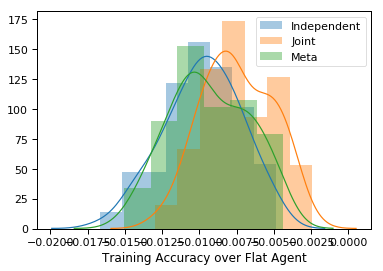

In [122]:
# Experiment 2
sns.distplot(training_acc.loc[(training_acc.Experiment == 'Exp 3') & (training_acc.Model == 'Independent'), 'Accuracy'].values - \
training_acc.loc[(training_acc.Experiment == 'Exp 3') & (training_acc.Model == 'Flat'), 'Accuracy'].values, label='Independent')

sns.distplot(training_acc.loc[(training_acc.Experiment == 'Exp 3') & (training_acc.Model == 'Joint'), 'Accuracy'].values - \
training_acc.loc[(training_acc.Experiment == 'Exp 3') & (training_acc.Model == 'Flat'), 'Accuracy'].values, label='Joint')

sns.distplot(training_acc.loc[(training_acc.Experiment == 'Exp 3') & (training_acc.Model == 'Meta'), 'Accuracy'].values - \
training_acc.loc[(training_acc.Experiment == 'Exp 3') & (training_acc.Model == 'Flat'), 'Accuracy'].values, label='Meta')
plt.legend()
plt.xlabel("Training Accuracy over Flat Agent")

d_i = training_acc.loc[(training_acc.Experiment == 'Exp 3') & (training_acc.Model == 'Independent'), 'Accuracy'].values - \
training_acc.loc[(training_acc.Experiment == 'Exp 3') & (training_acc.Model == 'Flat'), 'Accuracy'].values
d_j = training_acc.loc[(training_acc.Experiment == 'Exp 3') & (training_acc.Model == 'Joint'), 'Accuracy'].values - \
training_acc.loc[(training_acc.Experiment == 'Exp 3') & (training_acc.Model == 'Flat'), 'Accuracy'].values
d_m = training_acc.loc[(training_acc.Experiment == 'Exp 3') & (training_acc.Model == 'Meta'), 'Accuracy'].values -\
training_acc.loc[(training_acc.Experiment == 'Exp 3') & (training_acc.Model == 'Flat'), 'Accuracy'].values
# print p_i, p_j, p_m
d_i.sort()
d_j.sort()
d_m.sort()

n = len(d_i)
print "Indep Mean={}, 95% HDI = [{}, {}]".format(d_i.mean(), d_i[int(np.floor(n * 0.025))], d_i[int(np.ceil(n * 0.975))]) 
print "Joint Mean={}, 95% HDI = [{}, {}]".format(d_j.mean(), d_j[int(np.floor(n * 0.025))], d_j[int(np.ceil(n * 0.975))]) 
print "Meta  Mean={}, 95% HDI = [{}, {}]".format(d_m.mean(), d_m[int(np.floor(n * 0.025))], d_m[int(np.ceil(n * 0.975))])


